# Exploratory Data Analysis of Preprocessed Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

kaggle/input/.DS_Store
kaggle/input/Untitled.ipynb
kaggle/input/house-prices-advanced-regression-techniques/test.csv
kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
kaggle/input/house-prices-advanced-regression-techniques/train.csv
kaggle/input/.ipynb_checkpoints/Untitled-checkpoint.ipynb


In [2]:
train_path = 'kaggle/input/house-prices-advanced-regression-techniques/train.csv'
test_path = 'kaggle/input/house-prices-advanced-regression-techniques/test.csv'
train = pd.read_csv(train_path,index_col='Id')
test = pd.read_csv(test_path, index_col='Id')


In [3]:
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

## 1.0 Helper Utilties ##

### 1.1 Improve the Help Documentation for Efficient Lookup
First, create a searchable, segmented version of the help document that was provided with the Kaggle dataset.  In it's existing state, it's a very long document, making it an involved process to get to what you're looking for.  Wouldn't it be great if we could look up sections of the document based on a specific column we're interested in? 

First, create a function that takes the path of the training data and create s a dictionary to help text where the keys correspond to the column name.

Then, make a function (show) that we can call passing the fieldname and it will display the 
text or use a '?' along with a portion of the fieldname to search for available field descriptions

In [59]:
import re

def create_searchable_help(path):
    pattern = r'^([A-Za-z0-9]+): '
    with open(path,'r') as file:
        docs = file.readlines()
        linenum = 0
        lst = []
        for line in docs:
            key = re.findall(pattern,line,re.MULTILINE)
            if len(key) > 0:
                lst.append((linenum,key[0]))
            linenum += 1
        docdict  ={}
        for k,tup in enumerate(lst):
            start = tup[0]
            if len(lst) > k + 1:
                end = lst[k+1][0]
            else:
                end = -1
            text = " ".join([line for line in docs[start:end]])
            docdict[tup[1]] = {'text': text}
    return docdict

path = 'kaggle/input/house-prices-advanced-regression-techniques/data_description.txt'
docdict = create_searchable_help(path)

def show(topic):
    if '?' in topic:
        search = topic.split('?')
        search.remove('')
        lst = [x for x in docdict.keys() if search[0].strip().lower() in x.lower()]
        if len(lst) > 1:
            print(f"Columns Containing \'{search[0]}\' :\n  " + "\n  ".join(lst))
        elif len(lst) == 1:
            print(docdict[lst[0]]['text'])
            if 'charts' in docdict[lst[0]].keys():
                docdict[lst[0]]['charts']
    else:
        print(docdict[topic]['text'])

In [60]:
# Verify it works - pull an arbitrary field to retrieve its help text
show('GrLivArea')

GrLivArea: Above grade (ground) living area square feet
 



In [61]:
# Verify the search functionality works when it finds 1 result
# and multiple matches return a list to select from. 
# Searches are designated with a '?' as the first character in the search string
print("Example of searching and having a single match")
show('?Bed')

print("Example of multiple matches returned")
show('?SF')

Example of searching and having a single match
Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
 

Example of multiple matches returned
Columns Containing 'SF' :
  BsmtFinSF1
  BsmtFinSF2
  BsmtUnfSF
  TotalBsmtSF
  1stFlrSF
  2ndFlrSF
  LowQualFinSF
  WoodDeckSF
  OpenPorchSF


In [7]:
# Obtain a static list of the original columns in the dataframe
org_cols = train.columns

In [8]:
#Let's generate a few utilty functions. We know we'll have categorical data
# and we'll want to compare to SalePrice.  

def get_box_plot(field):
    box = sns.boxplot(data=train,
               x=field,
               y='SalePrice')
    return box 


def color_by_condition(val,color):
    if pd.isna(val) == True:
        return color
    else:
        return 'grey'

## 2: Data Exploration

### 2.1 Data Types and Missingness
As one of the first steps in exploring the data, we want to understand how both the kinds of data and how much is missin in BOTH sets

In [9]:
# Let's revisit the dataframe and evaluate which fields are numeric,
# which are ordinal-numeric (if any) and which are categorical. We'll also see which are missing values
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
# Next let's  make it easier to compare the datasets for missing evaluation.
df = pd.concat([train.count(),test.count()], axis=1,)
df.columns = ['Train','Test']
num_test = len(test)
num_train = len(train)

df.head() # first 5 columns for both train/test

Train    Test
MSSubClass    1460  1459.0
MSZoning      1460  1455.0
LotFrontage   1201  1232.0
LotArea       1460  1459.0
Street        1460  1459.0

In [15]:
# Evaluate how many complete columns we have in BOTH:

comp = df[(df["Train"] == num_train) &
   (df["Test"] == num_test)]
print(f"\n\nNumber of columns without missing data in either Train or Test: {len(comp)}")
comp.T.columns



Number of columns without missing data in either Train or Test: 45


Index(['MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition'],
      dtype='object')

In [12]:
# Let's see how many columns have < 3% missing data in either
miss = df[(df["Train"] < num_train)|
   (df["Test"] < num_test)]

miss_df = miss.copy()
miss_df['Train'] = num_train  - miss_df['Train'] 
miss_df['Test'] = num_test  - miss_df['Test']

print(f"\n\nNumber of columns with some missing data in either Train or Test: {len(miss)}")


miss_df



Number of columns with some missing data in either Train or Test: 34


Train    Test
MSZoning          0     4.0
LotFrontage     259   227.0
Alley          1369  1352.0
Utilities         0     2.0
Exterior1st       0     1.0
Exterior2nd       0     1.0
MasVnrType        8    16.0
MasVnrArea        8    15.0
BsmtQual         37    44.0
BsmtCond         37    45.0
BsmtExposure     38    44.0
BsmtFinType1     37    42.0
BsmtFinSF1        0     1.0
BsmtFinType2     38    42.0
BsmtFinSF2        0     1.0
BsmtUnfSF         0     1.0
TotalBsmtSF       0     1.0
Electrical        1     0.0
BsmtFullBath      0     2.0
BsmtHalfBath      0     2.0
KitchenQual       0     1.0
Functional        0     2.0
FireplaceQu     690   730.0
GarageType       81    76.0
GarageYrBlt      81    78.0
GarageFinish     81    78.0
GarageCars        0     1.0
GarageArea        0     1.0
GarageQual       81    78.0
GarageCond       81    78.0
PoolQC         1453  1456.0
Fence          1179  1169.0
MiscFeature    1406  1408.0
SaleType          0     1.0

It looks like there are a number of columns that are missing values. However only a few are missing a large number, making imputation on many of these a bit easier.  Anything with 5% or more missing values will require careful evaluation. We'll revisit these methods later on. One final thing we should do is create separate lists based on the types of data in that column. This will come in handy in the next section.

In [13]:
def get_columns_by_type():
    ord_cols =  ["OverallQual","OverallCond"]
    # Create a list of just the discrete columns (Note: we'll have to take out those columns that are ordinal)
    num_cols = [x for x in train.select_dtypes(include=['int64','float64']).columns if x not in ord_cols]

    # Create list of categorical features
    cat_cols = [x for x in train.select_dtypes(include=['object']).columns]
    return (num_cols[:-1],cat_cols, ord_cols, num_cols[-1])
    
num_cols, cat_cols,ord_cols,target = get_columns_by_type()

## 2.1 Numeric Feature Evaluation

In this section, I'll take a deep-dive into the existing numerical columns only. We'll want to understand the following:

- Understand what numeric features have a strong linear correlation to the target variable. These may be most beneficial to our linear model
- Understand any distribution differences between the train and test sets on these numeric features (we'll do the same on the other columns as well)


Note: manually adding in the SalePrice (target) column for this analysis

### 2.1.1 Target Variable EDA

<Axes: >

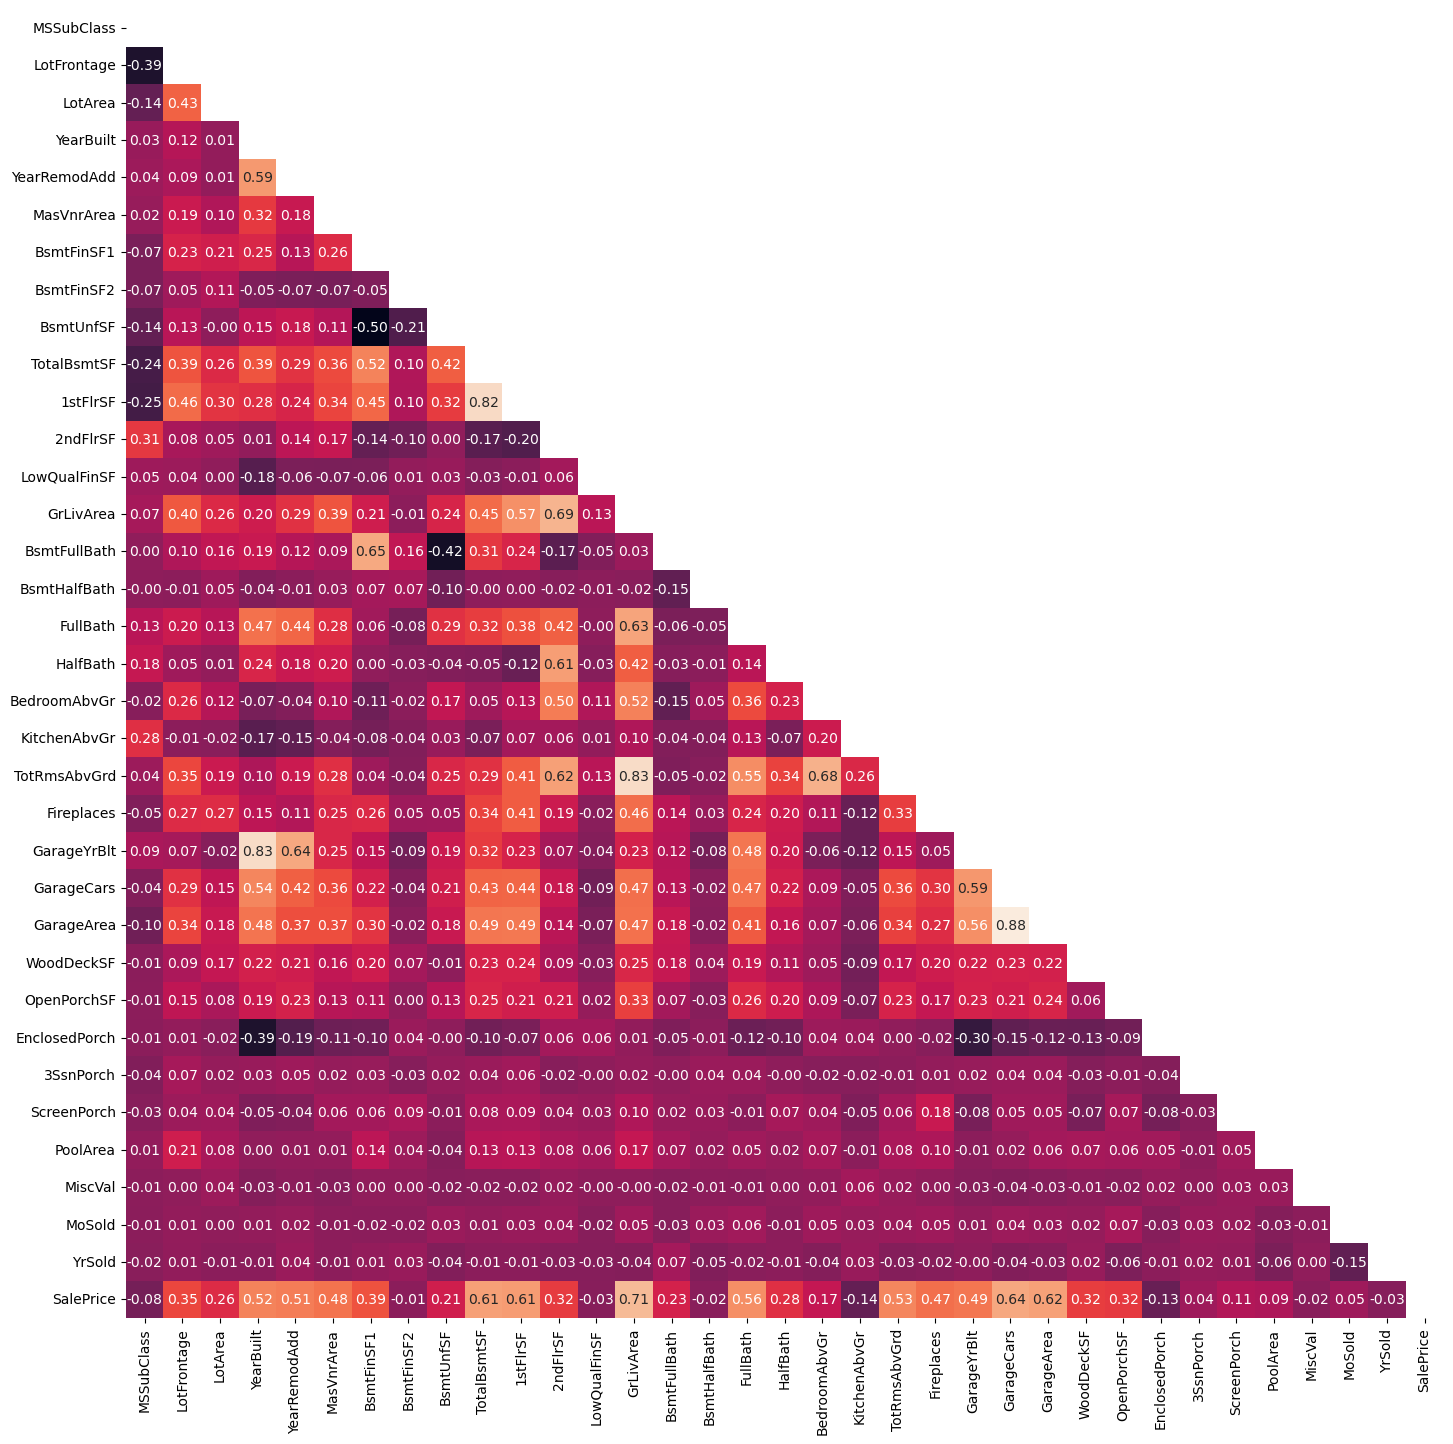

In [62]:

plt.figure(figsize=(17,17))
corr = train[num_cols + ['SalePrice']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,
            annot=True,
            mask=mask,
            fmt='.2f',
            cbar=False)

#Code modified from https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap

From the numeric raw features, it appears Living area above ground, Square Footage columns and GarageArea/Number of Cars all have at least a somewhat positive correlation to Sale Price. 

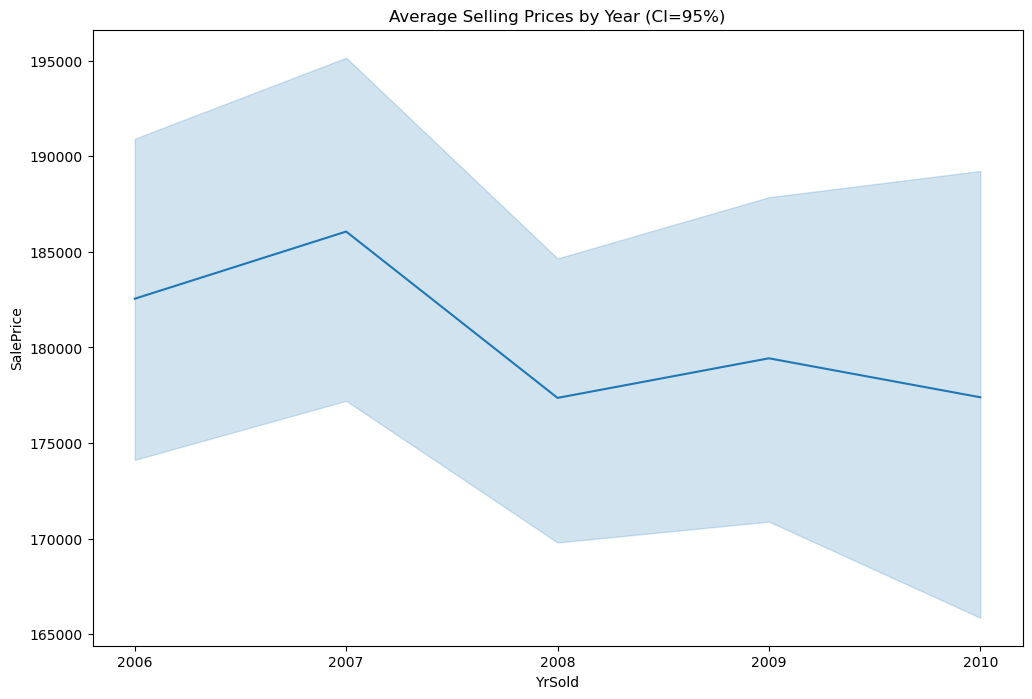

In [77]:
plt.figure(figsize=(12,8))

sns.lineplot(data=train, seed=0,
             x='YrSold',
             y='SalePrice')
plt.title("Average Selling Prices by Year (CI=95%)")
plt.xticks(ticks=[x for x in range(2006, 2011)]);

In [ ]:
train.groupby('YrSold')['SalePrice'].describe()

count           mean           std      min       25%       50%  \
YrSold                                                                    
2006    314.0  182549.458599  79426.838855  35311.0  131375.0  163995.0   
2007    329.0  186063.151976  85768.171410  39300.0  129900.0  167000.0   
2008    304.0  177360.838816  69735.610685  40000.0  131250.0  164000.0   
2009    338.0  179432.103550  80879.237311  34900.0  125250.0  162000.0   
2010    175.0  177393.674286  80451.280085  55000.0  128100.0  155000.0   

             75%       max  
YrSold                      
2006    218782.5  625000.0  
2007    219500.0  755000.0  
2008    207000.0  446261.0  
2009    212750.0  582933.0  
2010    213250.0  611657.0

This dataset is showing a large declie in sale prices from 2007 to 2008 (coinciding with the Housing Crisis). The prices never fully recovered after that.

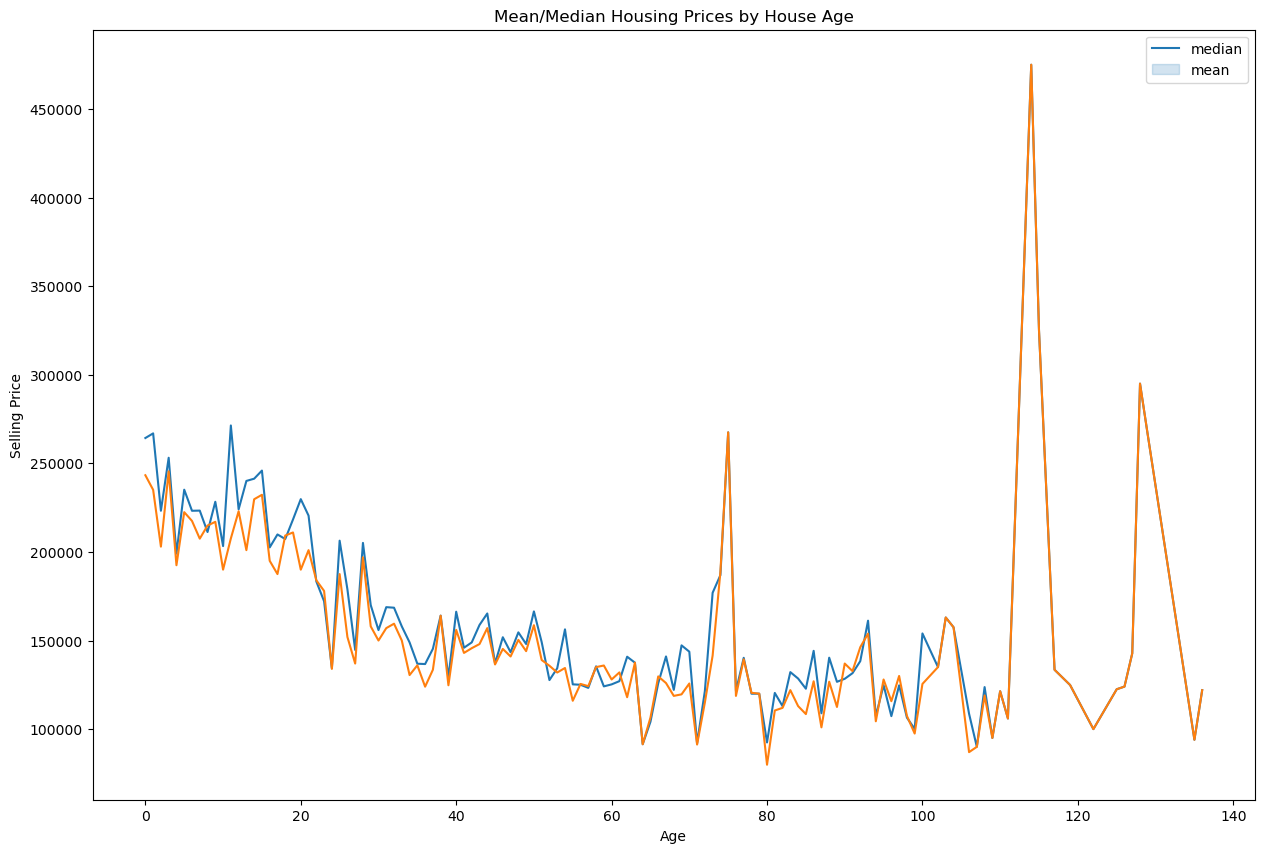

In [86]:
house_age = train['YrSold'] - train['YearBuilt']
house_age.name = "Age"
sales = pd.concat([house_age, train['SalePrice']],axis=1)

prices = sales.groupby('Age')['SalePrice'].agg(['mean', 'median'])
prices
plt.figure(figsize=(15,10))
sns.lineplot(data=prices,
            x=prices.index.astype('int'),
            y='mean',
            dashes=False)
median = sns.lineplot(data=prices,
            x=prices.index.astype('int'),
            y='median',
            dashes=True)

plt.ylabel('Selling Price')
plt.title('Mean/Median Housing Prices by House Age')
plt.legend(['median','mean'])
xlabels = [int(x) for x in prices.index]

Simplistically, newer homes fetch a higher selling price on average compared to older.  This only takes the age of the home into account; A remodeled older home might easily sell for much higher than a new home (perhaps that's what the large spikes are?) 

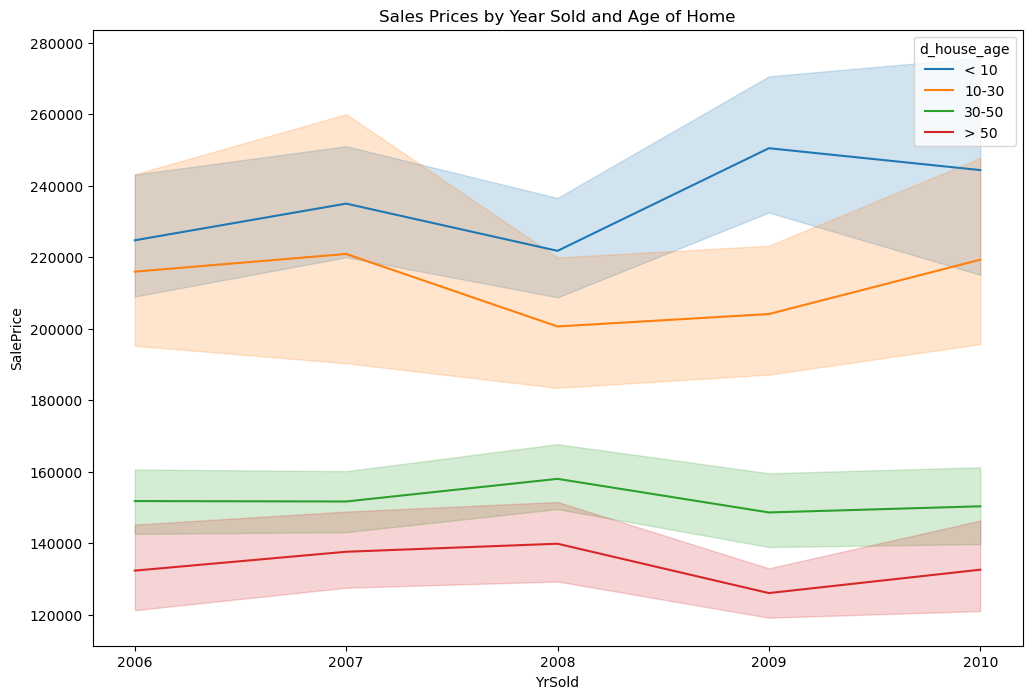

In [56]:
plt.figure(figsize=(12,8))
plt.title('Sales Prices by Year Sold and Age of Home')
plt.xticks(ticks=[2006,2007,2008,2009,2010])
sns.lineplot(data=train,
            x='YrSold',
            y='SalePrice',
            hue=labs);

The narrower range of older houses might imply less error predicting older homes. It's interesting to see that the price for older homes (green/red) saw a dip in 2008-2009 whereas newer homes saw  a moderate to high increase during this same year. This could be the skewed based on sample sizes.

<Axes: xlabel='YrSold', ylabel='count'>

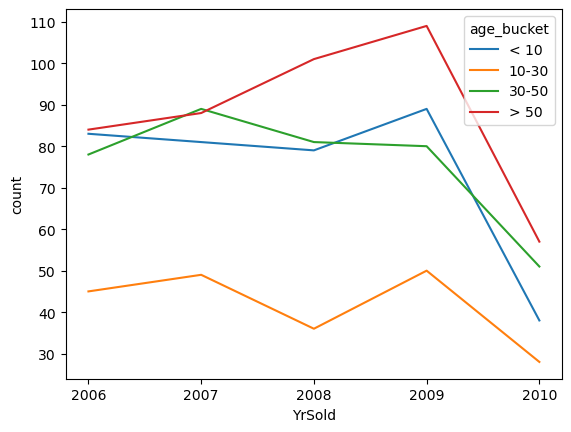

In [66]:
train['age_bucket'] = labs
hse = train.groupby(['age_bucket','YrSold'])['SalePrice'].describe().reset_index()
plt.xticks(ticks=[2006,2007,2008,2009,2010])
plt.
sns.lineplot(data=hse, x='YrSold', y='count', hue='age_bucket')


In [68]:
hse

age_bucket  YrSold  count           mean            std       min  \
0        < 10    2006   83.0  224740.590361   79323.731572  130000.0   
1        < 10    2007   81.0  234997.777778   74917.485934  131500.0   
2        < 10    2008   79.0  221784.582278   63875.475046  136500.0   
3        < 10    2009   89.0  250494.741573   86439.977283  140000.0   
4        < 10    2010   38.0  244378.921053   96096.853863  140000.0   
5       10-30    2006   45.0  215961.333333   85380.182436  127000.0   
6       10-30    2007   49.0  220908.979592  127759.792567   93500.0   
7       10-30    2008   36.0  200627.222222   57297.316248  119500.0   
8       10-30    2009   50.0  204103.240000   69209.785614  112000.0   
9       10-30    2010   28.0  219302.428571   70859.940430  125000.0   
10      30-50    2006   78.0  151777.179487   40253.460088   83000.0   
11      30-50    2007   89.0  151659.876404   42861.840217   75000.0   
12      30-50    2008   81.0  157993.098765   43168.876078   80000.0   
13      30-50    2009   80.0  148593.537500   46713.827507   62383.0   
14      30-50    2010   51.0  150310.784314   40750.093636   75500.0   
15       > 50    2006   84.0  132317.345238   55411.433192   35311.0   
16       > 50    2007   88.0  137594.272727   50771.709685   39300.0   
17       > 50    2008  101.0  139843.643564   57541.682273   40000.0   
18       > 50    2009  109.0  126035.440367   39158.046142   34900.0   
19       > 50    2010   57.0  132574.456140   51273.497115   55000.0   

          25%       50%       75%       max  
0   172075.00  200000.0  259000.0  556581.0  
1   178900.00  215000.0  270000.0  466500.0  
2   179650.00  207500.0  250000.0  426000.0  
3   190000.00  230000.0  280000.0  582933.0  
4   199425.00  216250.0  252512.5  611657.0  
5   162900.00  190000.0  250000.0  625000.0  
6   150000.00  187500.0  240000.0  755000.0  
7   170375.00  187500.0  211250.0  350000.0  
8   155502.75  185000.0  237500.0  403000.0  
9   169250.00  198500.0  242475.0  410000.0  
10  129900.00  145000.0  164987.5  280000.0  
11  126500.00  141000.0  169500.0  302000.0  
12  134432.00  149350.0  175000.0  299800.0  
13  124375.00  143625.0  165125.0  375000.0  
14  127250.00  148000.0  168700.0  260000.0  
15  106125.00  119700.0  141150.0  475000.0  
16  109675.00  128750.0  147875.0  359100.0  
17  108000.00  129500.0  160000.0  381000.0  
18  103600.00  124500.0  147000.0  265979.0  
19  107400.00  128000.0  144900.0  335000.0

In [64]:
# find which columns have missing values 
# and the proportion that are missing

missing = train[num_cols].isnull().sum()
missing = missing.where(missing > 0).dropna()
round(missing / 1460,2)

LotFrontage    0.18
MasVnrArea     0.01
GarageYrBlt    0.06
dtype: float64

In [65]:
# LotFrontage has 18% missing values which is quite large! 

# Let's find out the absolute values of the correlation coefficients
# sorted in descending value from most correlated (highest) to least 

(abs(train[num_cols + [target]]
 .corr()
 .loc['SalePrice'])
 .sort_values(ascending=False))[1:]

GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

The above grid suggests that the two features most correlated to LotFrontage (represented along x and y-axes) will have enough close data points to approximate the values for the LotFrontage.  There are a few outliers (near LotAreas with log-values of 12 as well as values near 1stFlrsF of 3k and lot areas near log-values between 9 and 10 but at they are a minor few.

### 2.1.2 Comparison of Numeric Column's Distributions (Train vs Test)

For the purposes of understanding how different our train/test data is from a distribution standpoint, let's combine both sets into one and compare the distributions for each column.

/Users/davidboudia/anaconda3/envs/python3_11/lib/python3.11/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


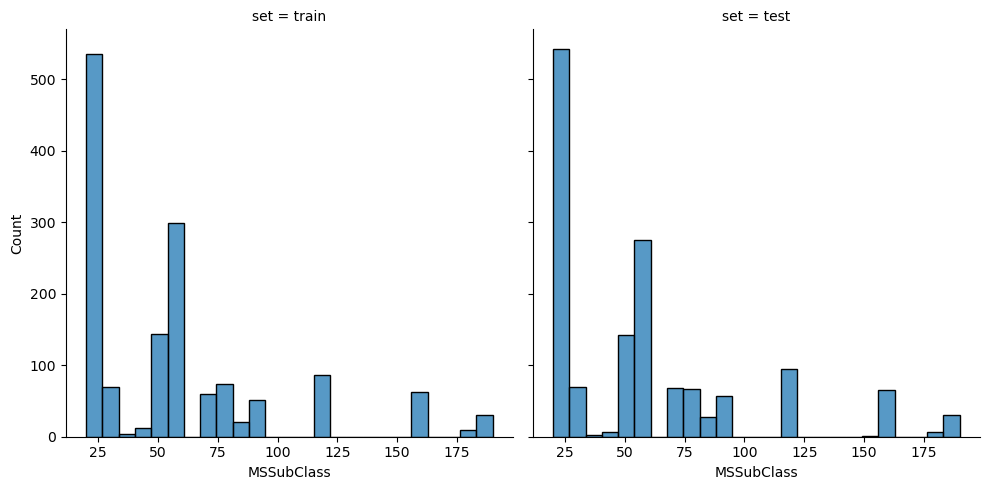

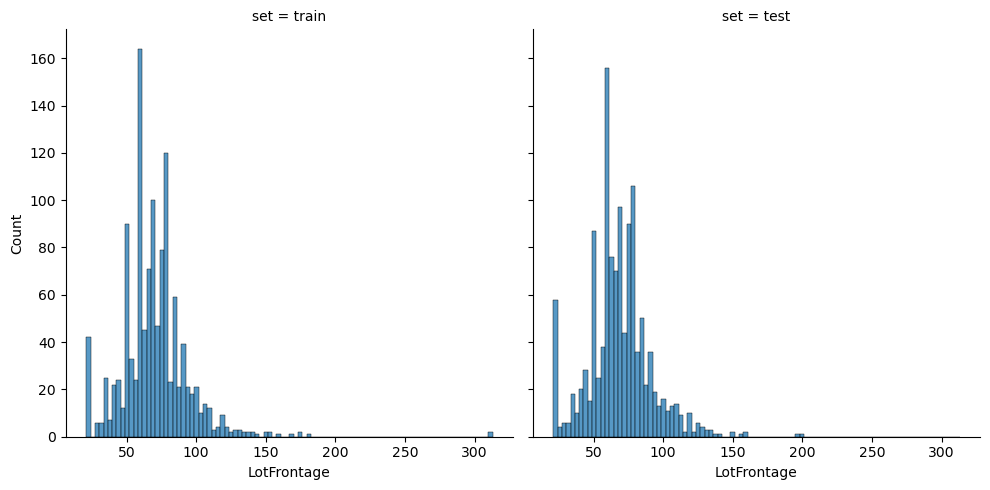

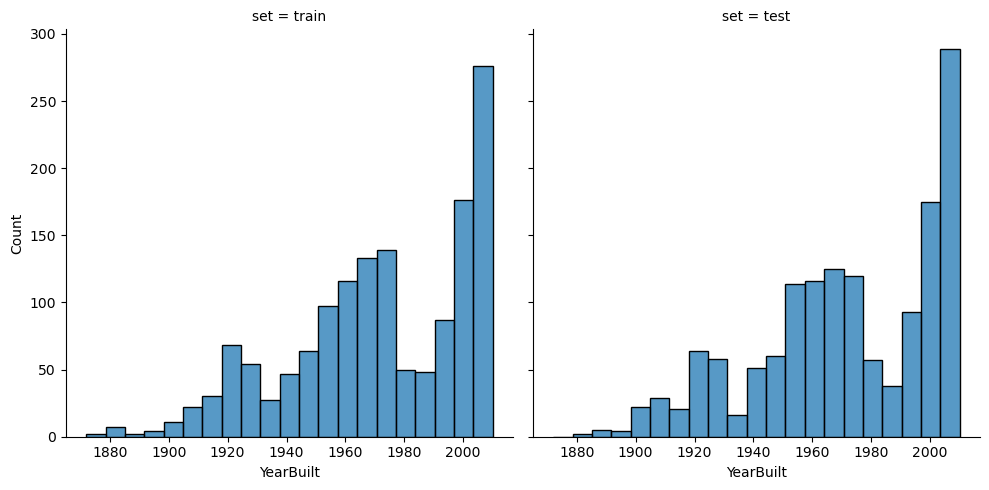

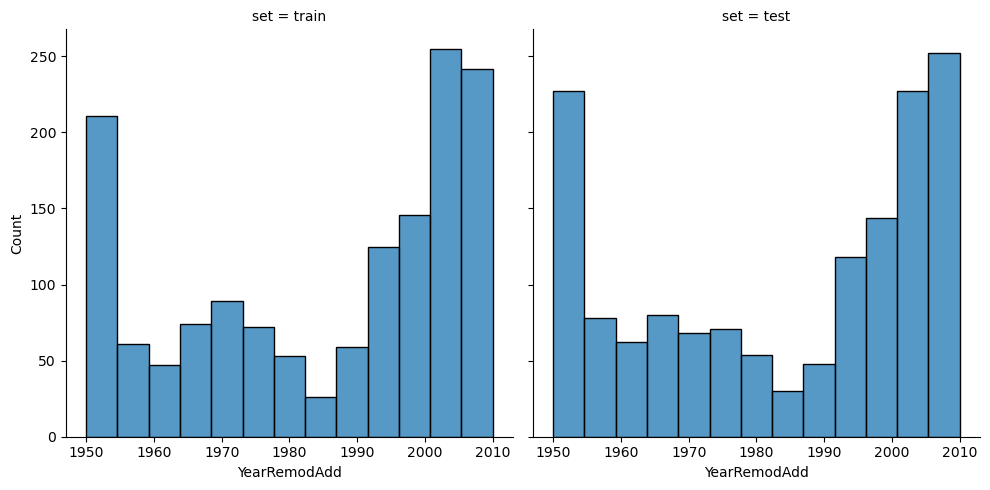

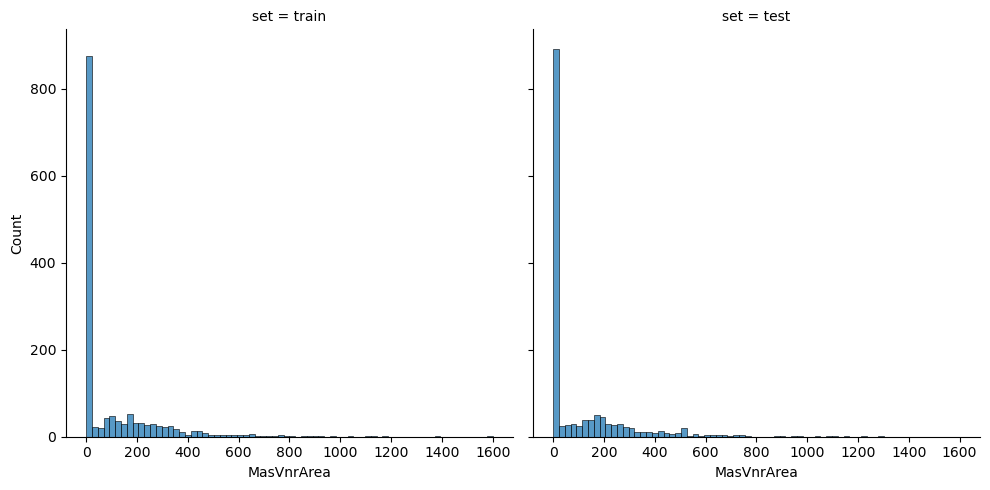

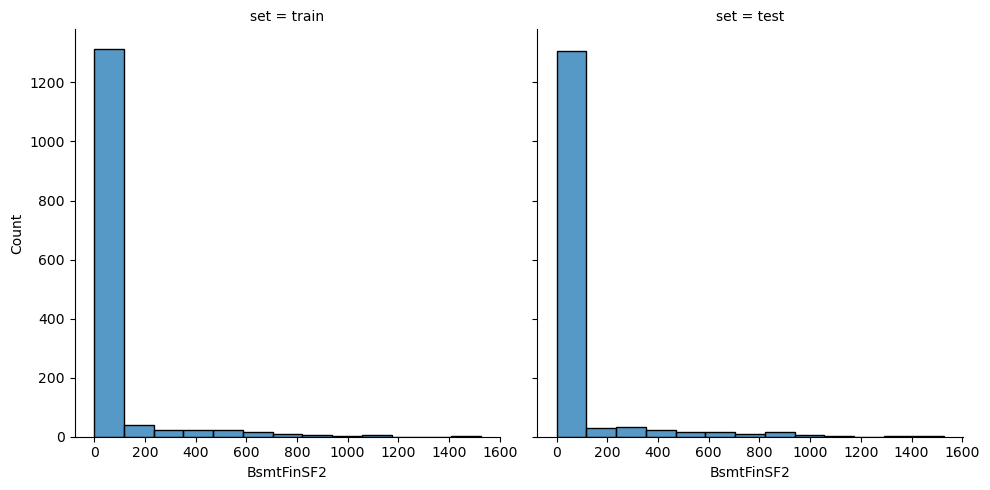

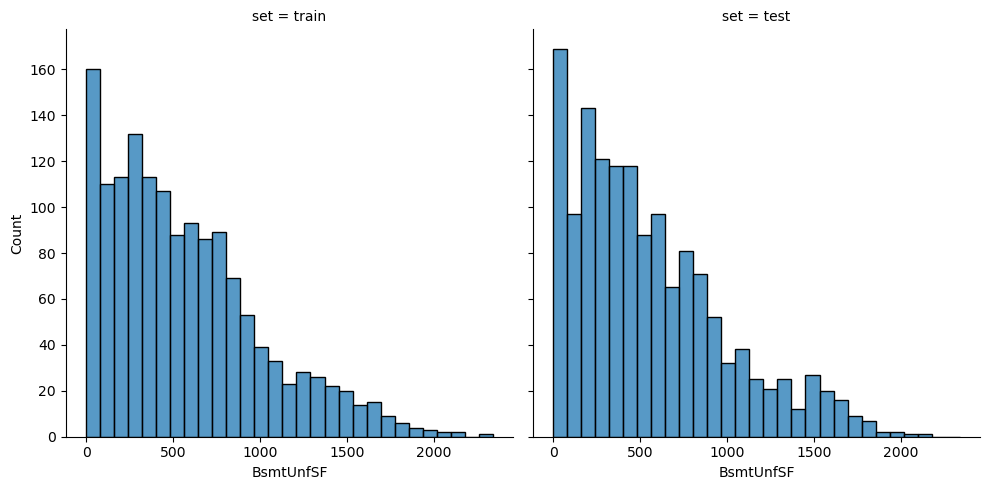

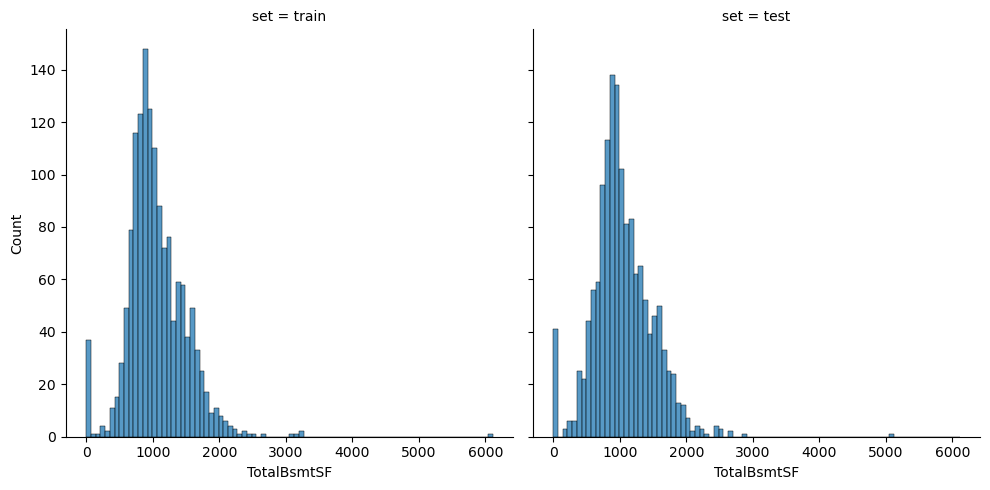

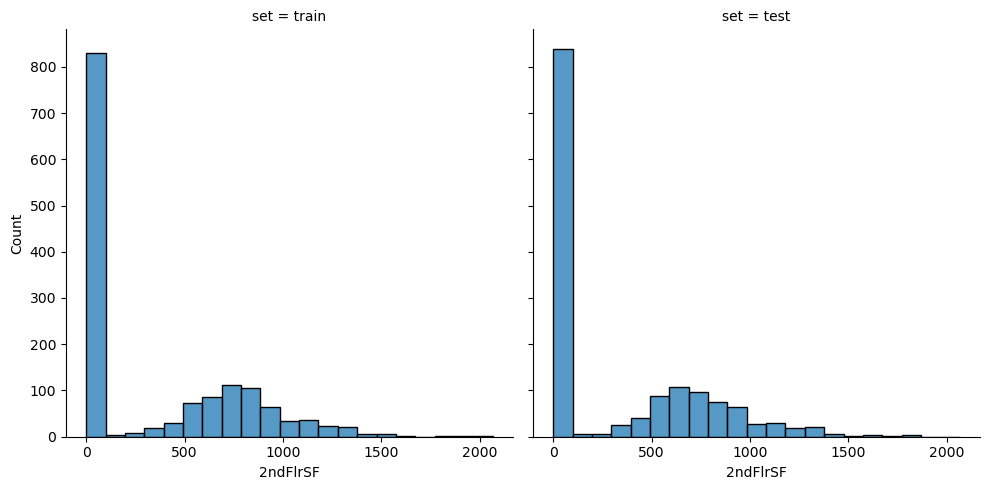

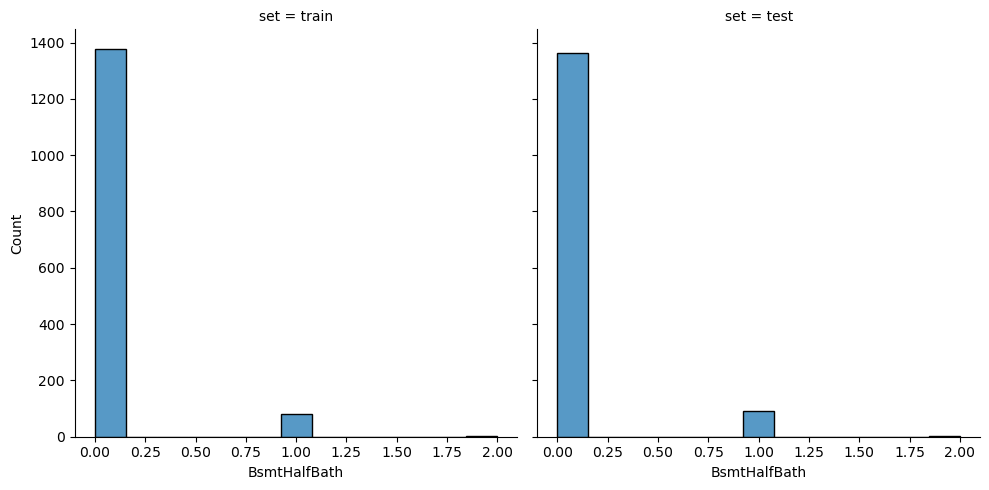

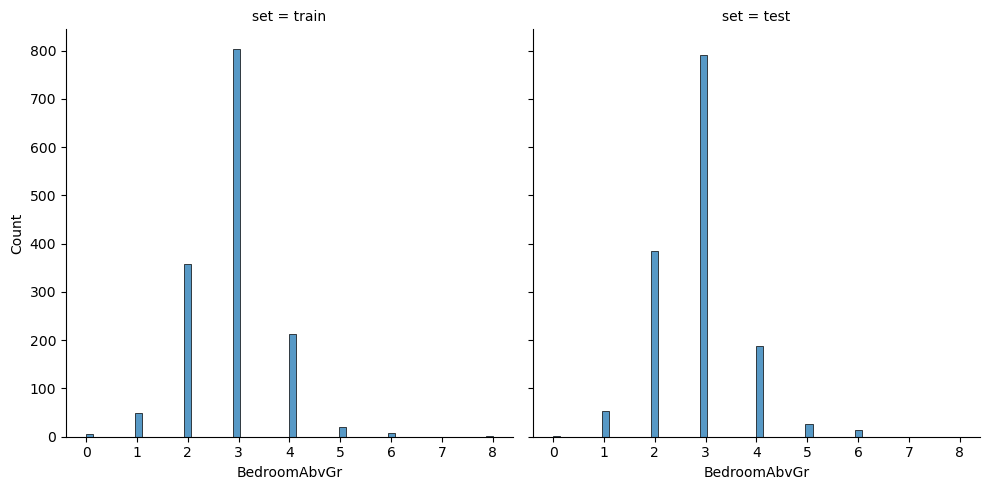

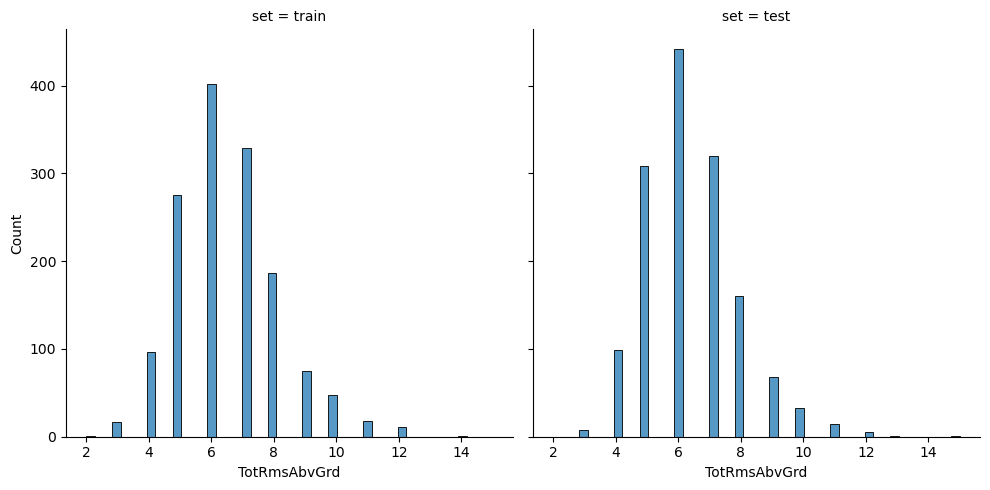

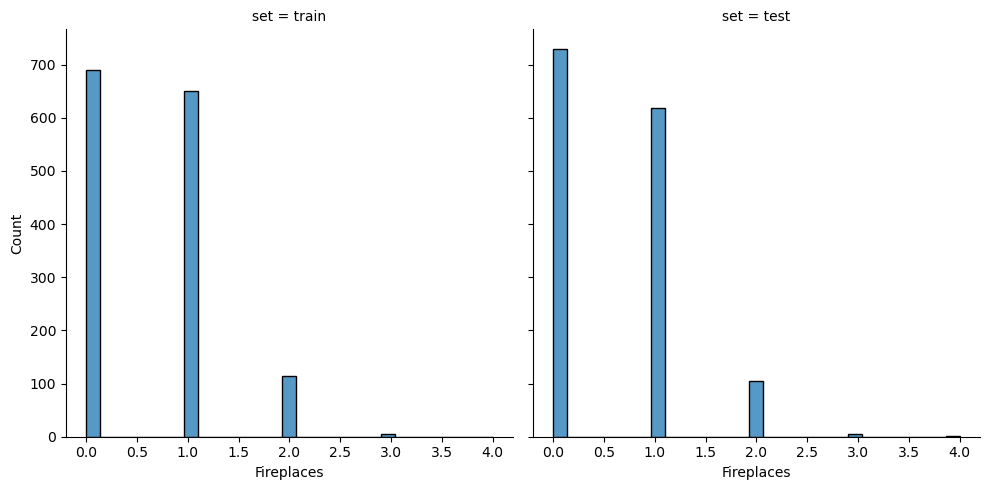

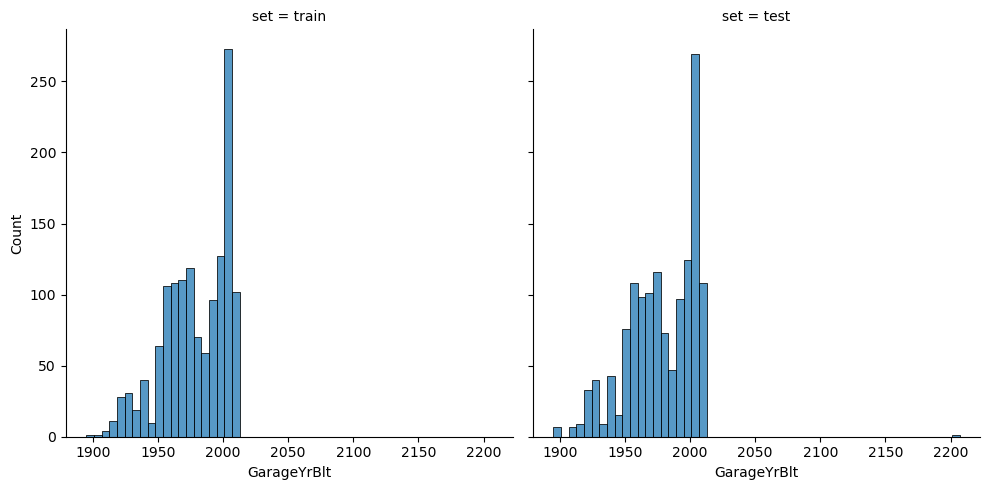

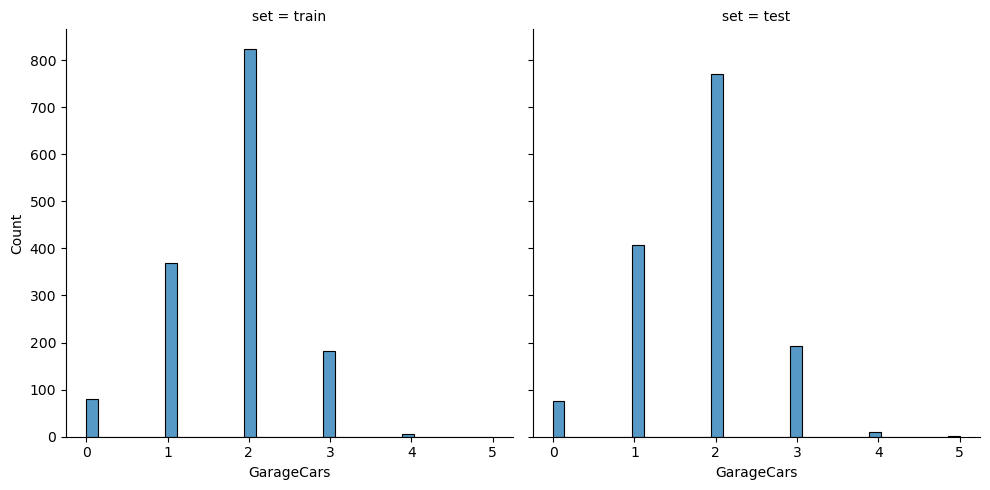

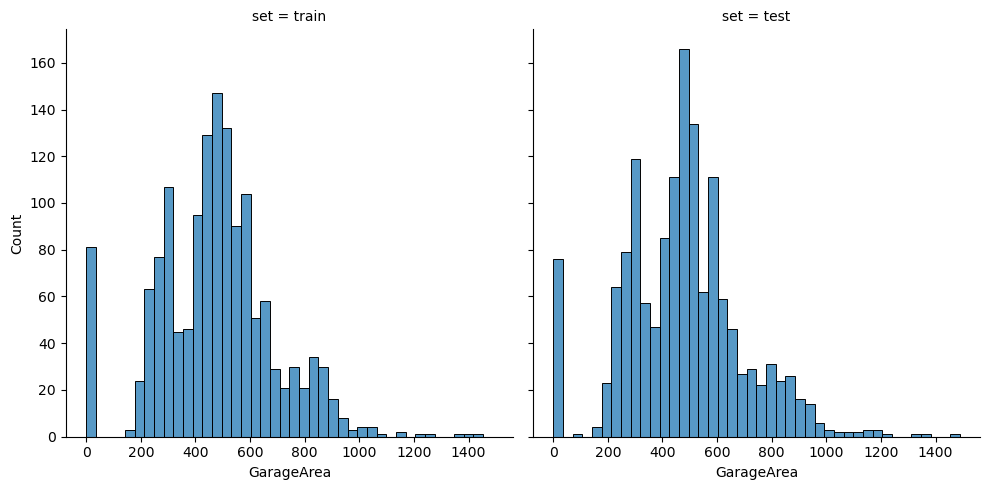

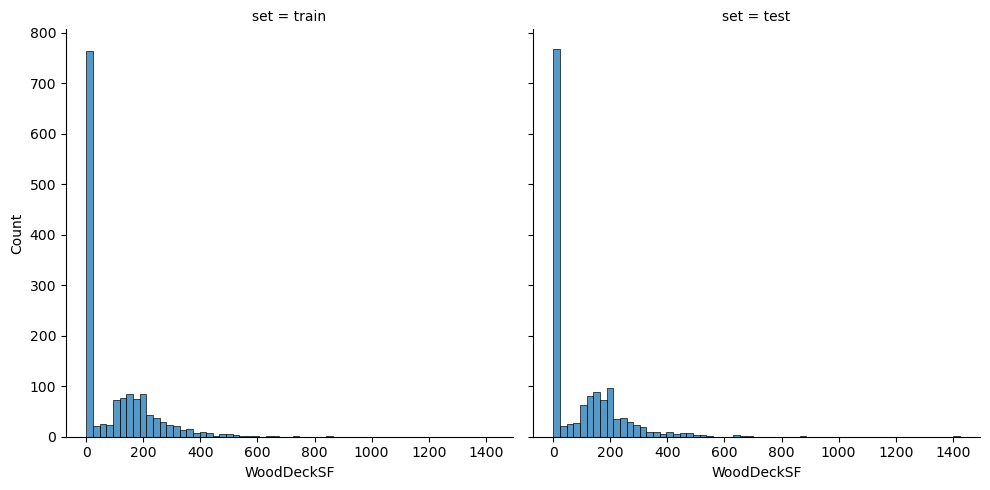

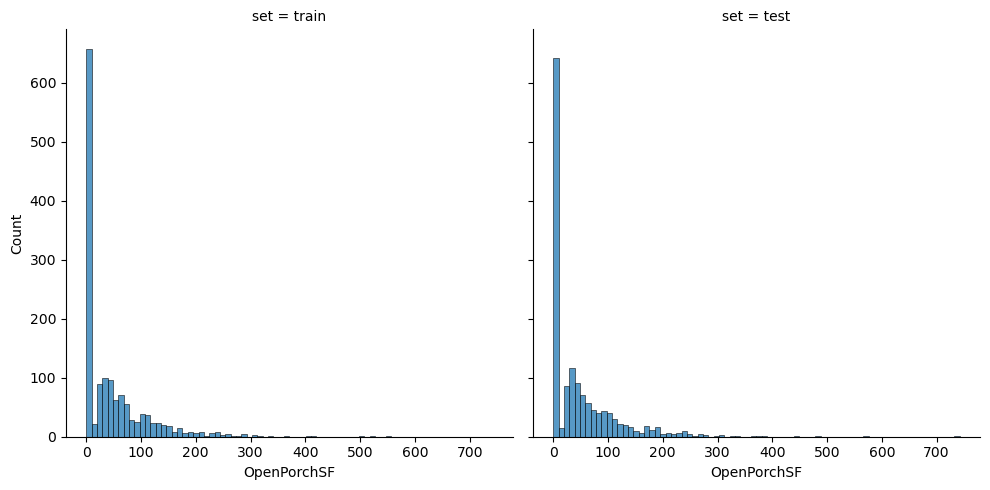

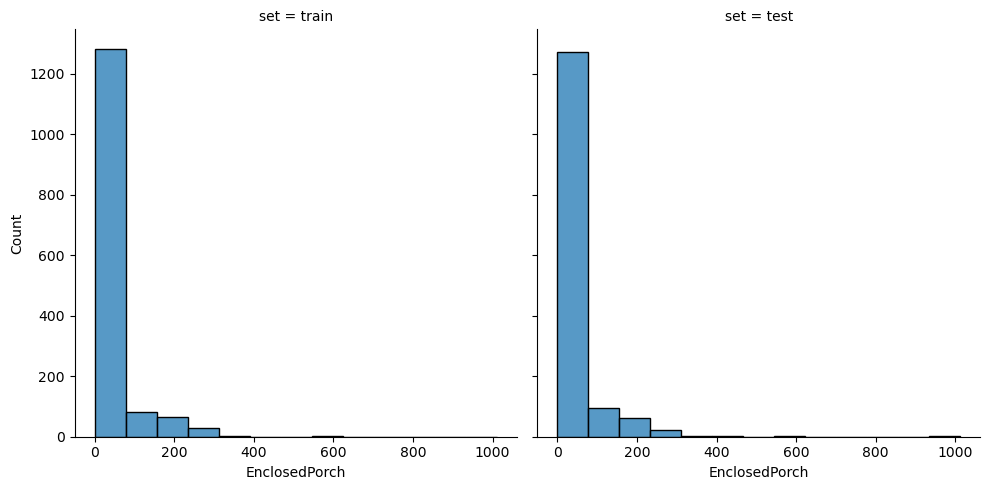

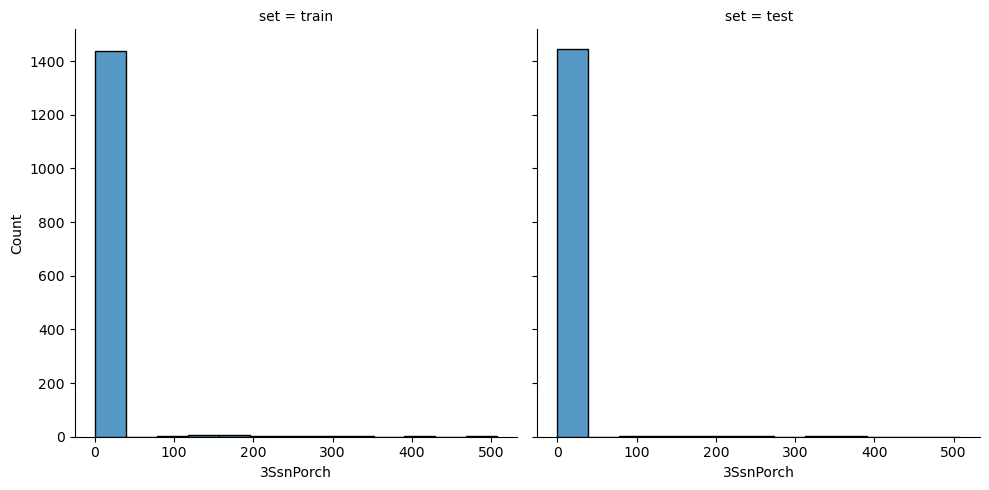

In [74]:
train['set'] = 'train'
test['set'] = 'test'
comb = pd.concat([train,test]) 

for i,n in enumerate(num_cols[:-3]):
    ax = sns.displot(comb, x=n, col='set')
plt.close()

For the most part, the numeric columns seem to have nearly identical distributions.  This will make inference much easier.  However, several of these columns have very large outliers/scales.  In addition, the data is very heterogenious; data have quite a log_scaleety of scales.  We'll need to evaluate scaling and centering methods to improve efficiency of training and ensure our model(s) is of appropriate complexity. Let's take a quick look at the categorical columns and see how both sets compare by column.

## 2.2 Categorical Column Evaluation ##

One of the challenges of understanding categorical data is that each column can take a range of values with different meanings. Due to the number of columns and values, we'll embed the online help text function (created earlier) for efficient interpretation. We'll plot each categorical column in the dataset with one Box-and-whiskers plot providing interquartile range and outlier information and a stripplot that we can use to visualize the density (volume) of data in relation to the target and the adjacent plot. Finally, we always want to keep our eye how frequencies differ between training and test so we'll create a third plot from the combined dataset that compares the frequencies of each category per set.

MSZoning: Identifies the general zoning classification of the sale.
 		
        A	Agriculture
        C	Commercial
        FV	Floating Village Residential
        I	Industrial
        RH	Residential High Density
        RL	Residential Low Density
        RP	Residential Low Density Park 
        RM	Residential Medium Density
 	



Street: Type of road access to property
 
        Grvl	Gravel	
        Pave	Paved
        	



Alley: Type of alley access to property
 
        Grvl	Gravel
        Pave	Paved
        NA 	No alley access
 		



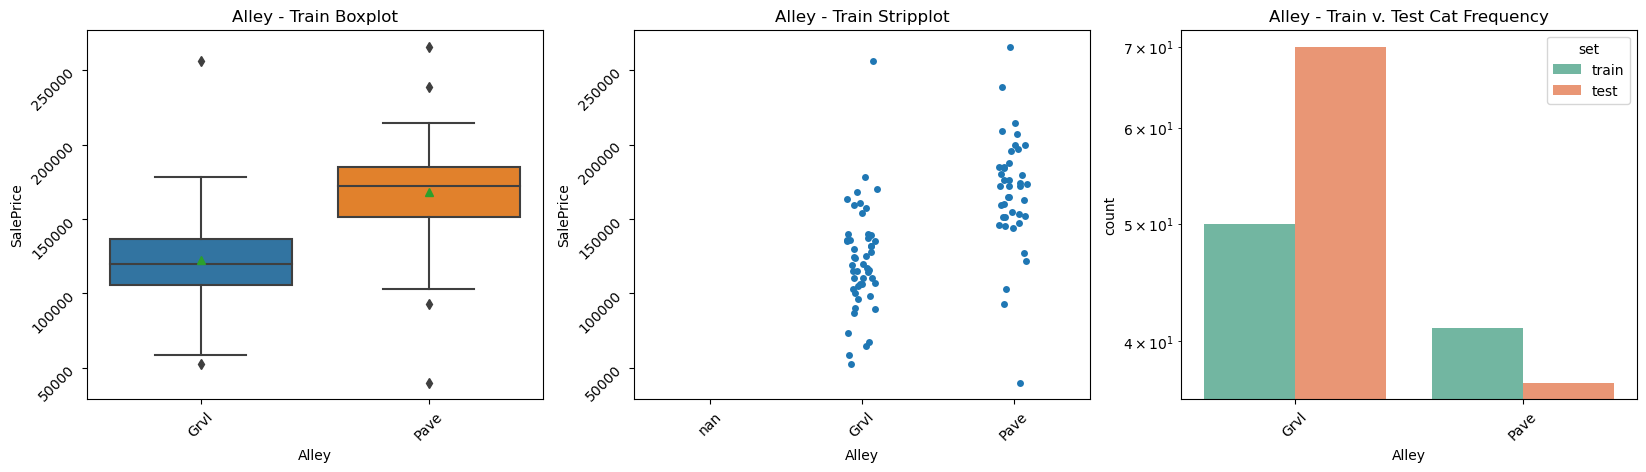

LotShape: General shape of property
 
        Reg	Regular	
        IR1	Slightly irregular
        IR2	Moderately Irregular
        IR3	Irregular
        



LandContour: Flatness of the property
 
        Lvl	Near Flat/Level	
        Bnk	Banked - Quick and significant rise from street grade to building
        HLS	Hillside - Significant slope from side to side
        Low	Depression
 		



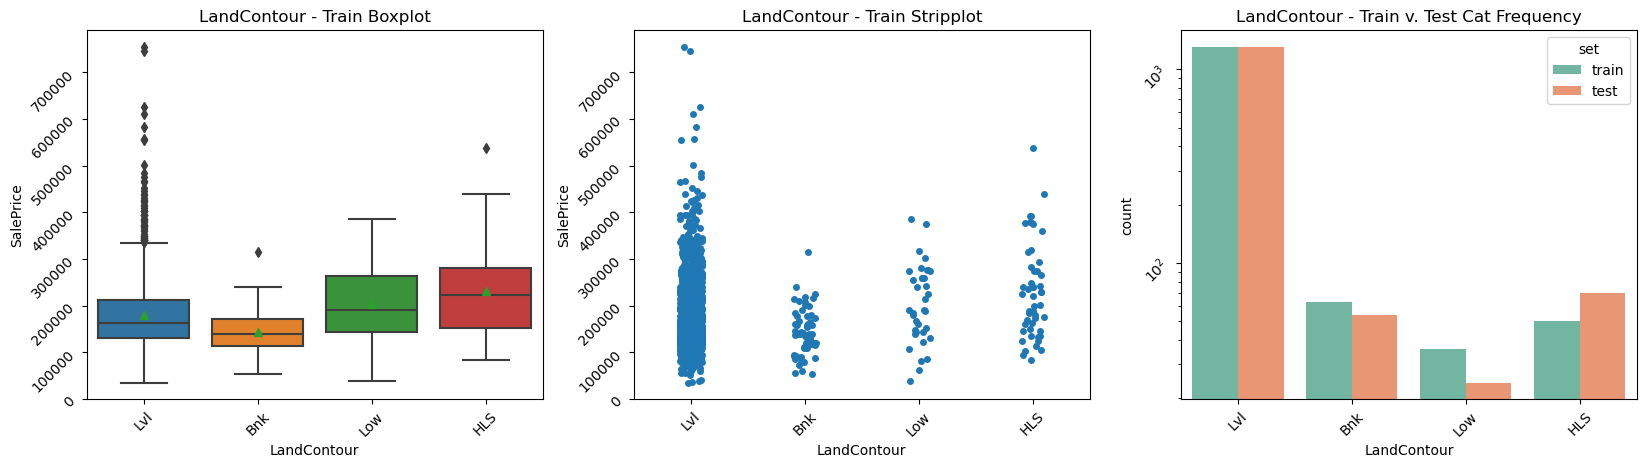

Utilities: Type of utilities available
 		
        AllPub	All public Utilities (E,G,W,& S)	
        NoSewr	Electricity, Gas, and Water (Septic Tank)
        NoSeWa	Electricity and Gas Only
        ELO	Electricity only	
 	



LotConfig: Lot configuration
 
        Inside	Inside lot
        Corner	Corner lot
        CulDSac	Cul-de-sac
        FR2	Frontage on 2 sides of property
        FR3	Frontage on 3 sides of property
 	



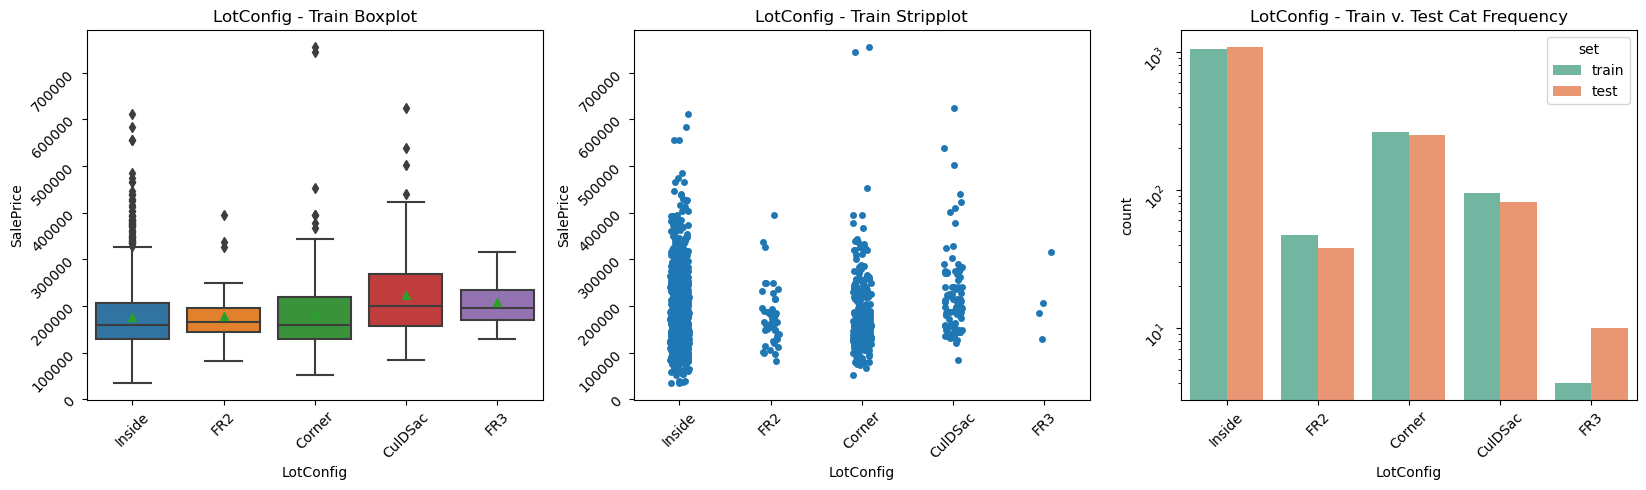

LandSlope: Slope of property
 		
        Gtl	Gentle slope
        Mod	Moderate Slope	
        Sev	Severe Slope
 	



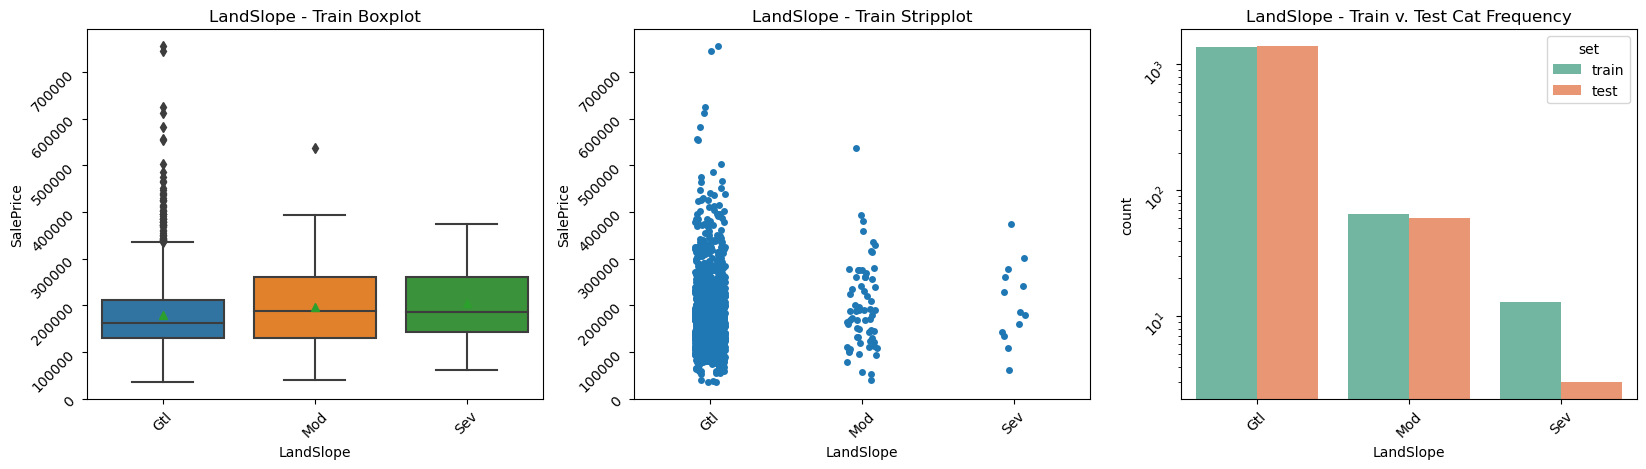

Neighborhood: Physical locations within Ames city limits
 
        Blmngtn	Bloomington Heights
        Blueste	Bluestem
        BrDale	Briardale
        BrkSide	Brookside
        ClearCr	Clear Creek
        CollgCr	College Creek
        Crawfor	Crawford
        Edwards	Edwards
        Gilbert	Gilbert
        IDOTRR	Iowa DOT and Rail Road
        MeadowV	Meadow Village
        Mitchel	Mitchell
        Names	North Ames
        NoRidge	Northridge
        NPkVill	Northpark Villa
        NridgHt	Northridge Heights
        NWAmes	Northwest Ames
        OldTown	Old Town
        SWISU	South & West of Iowa State University
        Sawyer	Sawyer
        SawyerW	Sawyer West
        Somerst	Somerset
        StoneBr	Stone Brook
        Timber	Timberland
        Veenker	Veenker
 			



Condition1: Proximity to various conditions
 	
        Artery	Adjacent to arterial street
        Feedr	Adjacent to feeder street	
        Norm	Normal	
        RRNn	Within 200' of North-South Railroad
        RRAn	Adjacent to North-South Railroad
        PosN	Near positive off-site feature--park, greenbelt, etc.
        PosA	Adjacent to postive off-site feature
        RRNe	Within 200' of East-West Railroad
        RRAe	Adjacent to East-West Railroad
 	



Condition2: Proximity to various conditions (if more than one is present)
 		
        Artery	Adjacent to arterial street
        Feedr	Adjacent to feeder street	
        Norm	Normal	
        RRNn	Within 200' of North-South Railroad
        RRAn	Adjacent to North-South Railroad
        PosN	Near positive off-site feature--park, greenbelt, etc.
        PosA	Adjacent to postive off-site feature
        RRNe	Within 200' of East-West Railroad
        RRAe	Adjacent to East-West Railroad
 	



BldgType: Type of dwelling
 		
        1Fam	Single-family Detached	
        2FmCon	Two-family Conversion; originally built as one-family dwelling
        Duplx	Duplex
        TwnhsE	Townhouse End Unit
        TwnhsI	Townhouse Inside Unit
 	



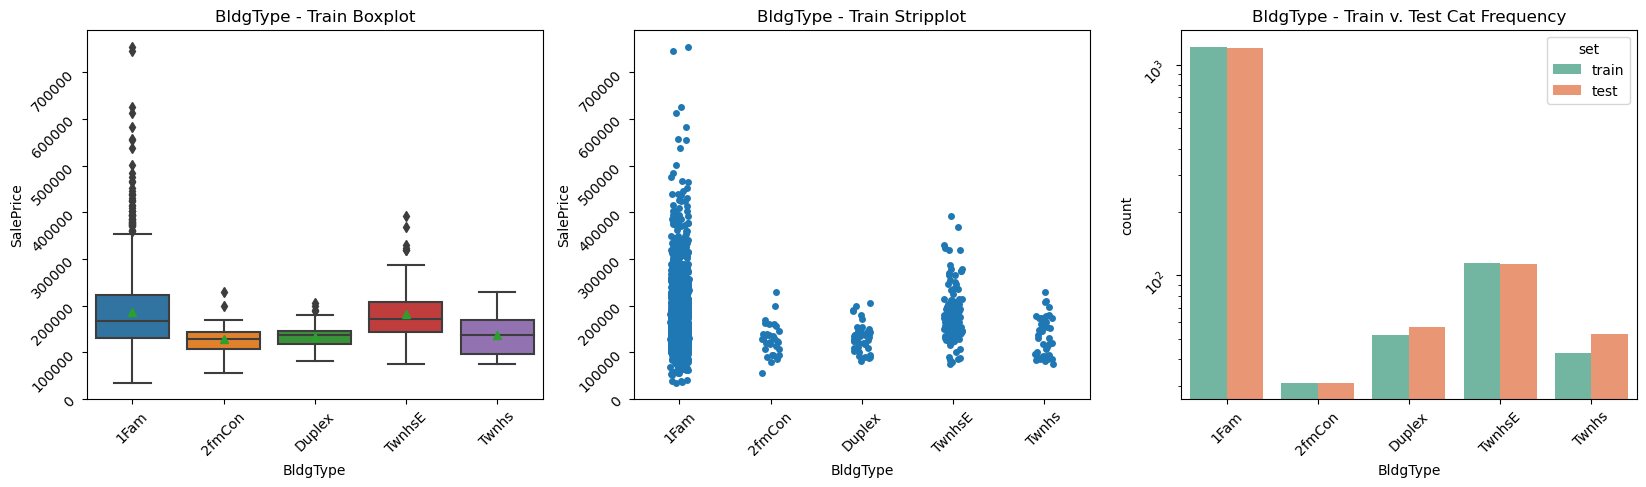

HouseStyle: Style of dwelling
 	
        1Story	One story
        1.5Fin	One and one-half story: 2nd level finished
        1.5Unf	One and one-half story: 2nd level unfinished
        2Story	Two story
        2.5Fin	Two and one-half story: 2nd level finished
        2.5Unf	Two and one-half story: 2nd level unfinished
        SFoyer	Split Foyer
        SLvl	Split Level
 	



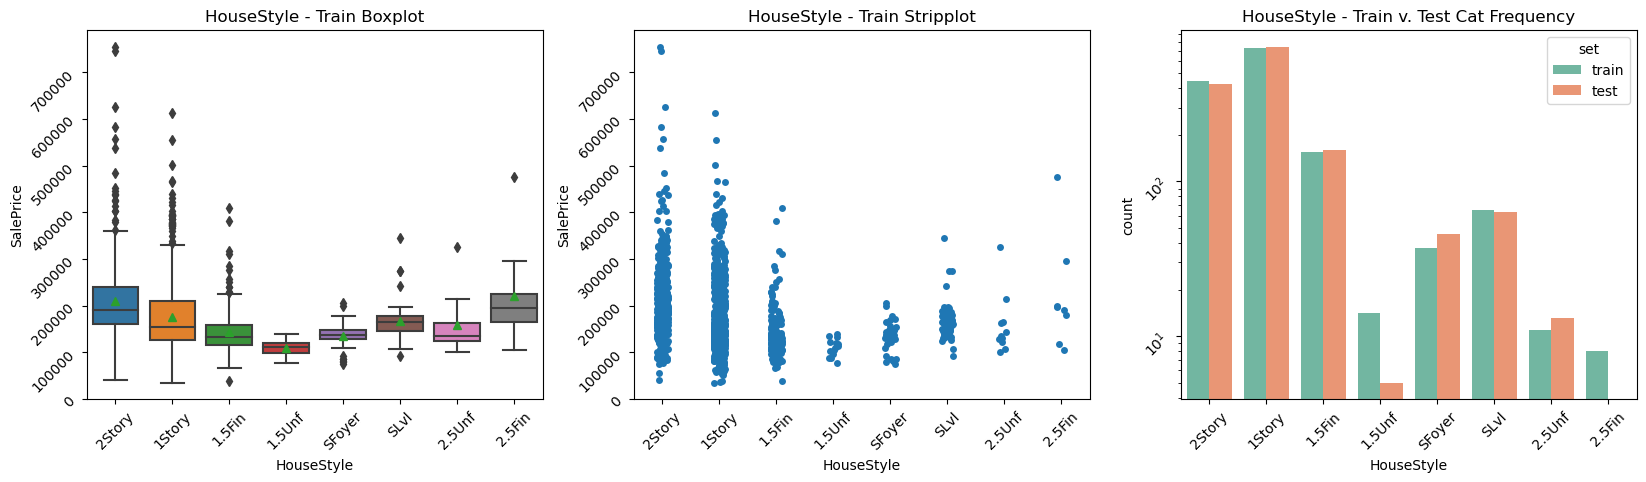

RoofStyle: Type of roof
 
        Flat	Flat
        Gable	Gable
        Gambrel	Gabrel (Barn)
        Hip	Hip
        Mansard	Mansard
        Shed	Shed
 		



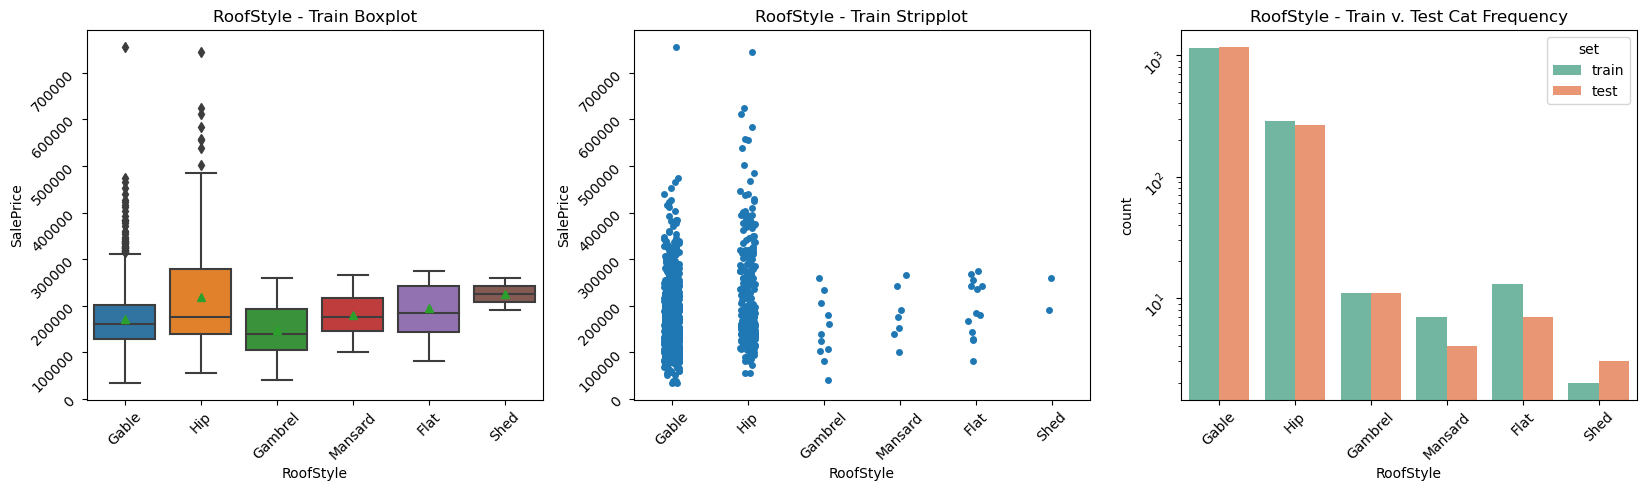

RoofMatl: Roof material
 
        ClyTile	Clay or Tile
        CompShg	Standard (Composite) Shingle
        Membran	Membrane
        Metal	Metal
        Roll	Roll
        Tar&Grv	Gravel & Tar
        WdShake	Wood Shakes
        WdShngl	Wood Shingles
 		



Exterior1st: Exterior covering on house
 
        AsbShng	Asbestos Shingles
        AsphShn	Asphalt Shingles
        BrkComm	Brick Common
        BrkFace	Brick Face
        CBlock	Cinder Block
        CemntBd	Cement Board
        HdBoard	Hard Board
        ImStucc	Imitation Stucco
        MetalSd	Metal Siding
        Other	Other
        Plywood	Plywood
        PreCast	PreCast	
        Stone	Stone
        Stucco	Stucco
        VinylSd	Vinyl Siding
        Wd Sdng	Wood Siding
        WdShing	Wood Shingles
 	



Exterior2nd: Exterior covering on house (if more than one material)
 
        AsbShng	Asbestos Shingles
        AsphShn	Asphalt Shingles
        BrkComm	Brick Common
        BrkFace	Brick Face
        CBlock	Cinder Block
        CemntBd	Cement Board
        HdBoard	Hard Board
        ImStucc	Imitation Stucco
        MetalSd	Metal Siding
        Other	Other
        Plywood	Plywood
        PreCast	PreCast
        Stone	Stone
        Stucco	Stucco
        VinylSd	Vinyl Siding
        Wd Sdng	Wood Siding
        WdShing	Wood Shingles
 	



MasVnrType: Masonry veneer type
 
        BrkCmn	Brick Common
        BrkFace	Brick Face
        CBlock	Cinder Block
        None	None
        Stone	Stone
 	



ExterQual: Evaluates the quality of the material on the exterior 
 		
        Ex	Excellent
        Gd	Good
        TA	Average/Typical
        Fa	Fair
        Po	Poor
 		



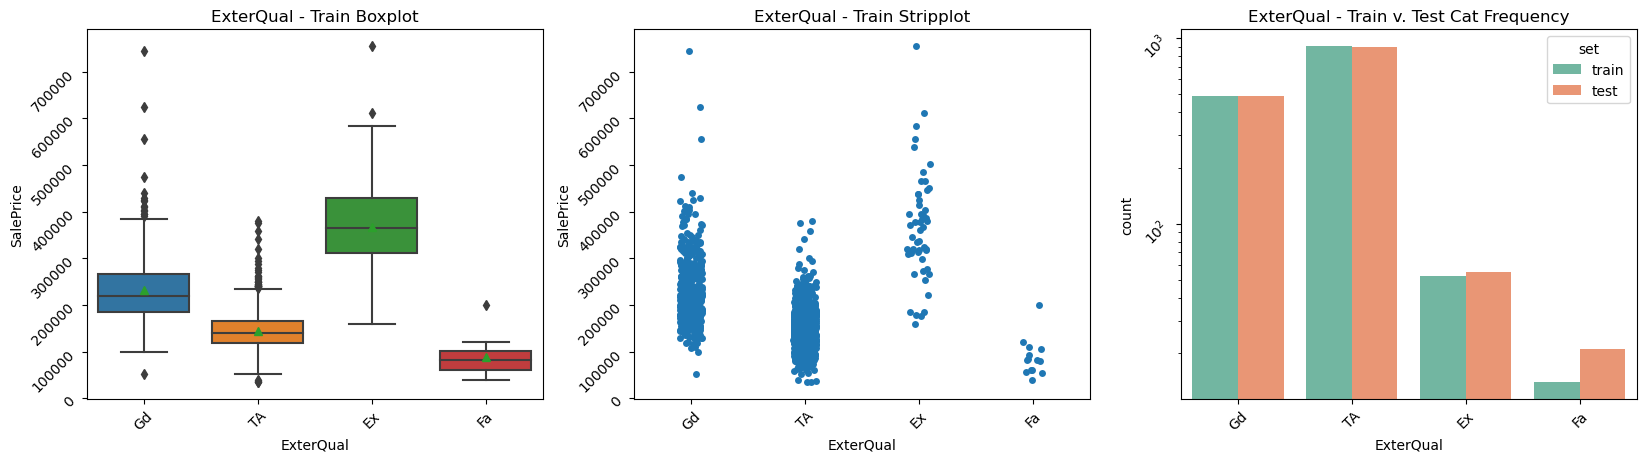

ExterCond: Evaluates the present condition of the material on the exterior
 		
        Ex	Excellent
        Gd	Good
        TA	Average/Typical
        Fa	Fair
        Po	Poor
 		



Foundation: Type of foundation
 		
        BrkTil	Brick & Tile
        CBlock	Cinder Block
        PConc	Poured Contrete	
        Slab	Slab
        Stone	Stone
        Wood	Wood
 		



BsmtQual: Evaluates the height of the basement
 
        Ex	Excellent (100+ inches)	
        Gd	Good (90-99 inches)
        TA	Typical (80-89 inches)
        Fa	Fair (70-79 inches)
        Po	Poor (<70 inches
        NA	No Basement
 		



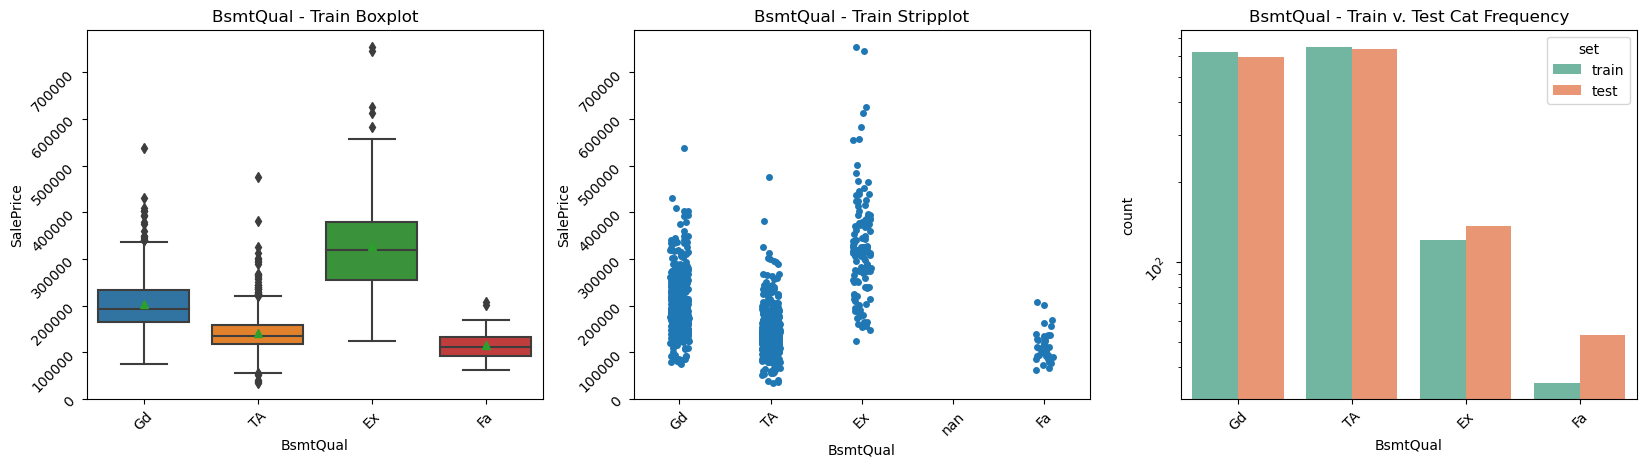

BsmtCond: Evaluates the general condition of the basement
 
        Ex	Excellent
        Gd	Good
        TA	Typical - slight dampness allowed
        Fa	Fair - dampness or some cracking or settling
        Po	Poor - Severe cracking, settling, or wetness
        NA	No Basement
 	



BsmtExposure: Refers to walkout or garden level walls
 
        Gd	Good Exposure
        Av	Average Exposure (split levels or foyers typically score average or above)	
        Mn	Mimimum Exposure
        No	No Exposure
        NA	No Basement
 	



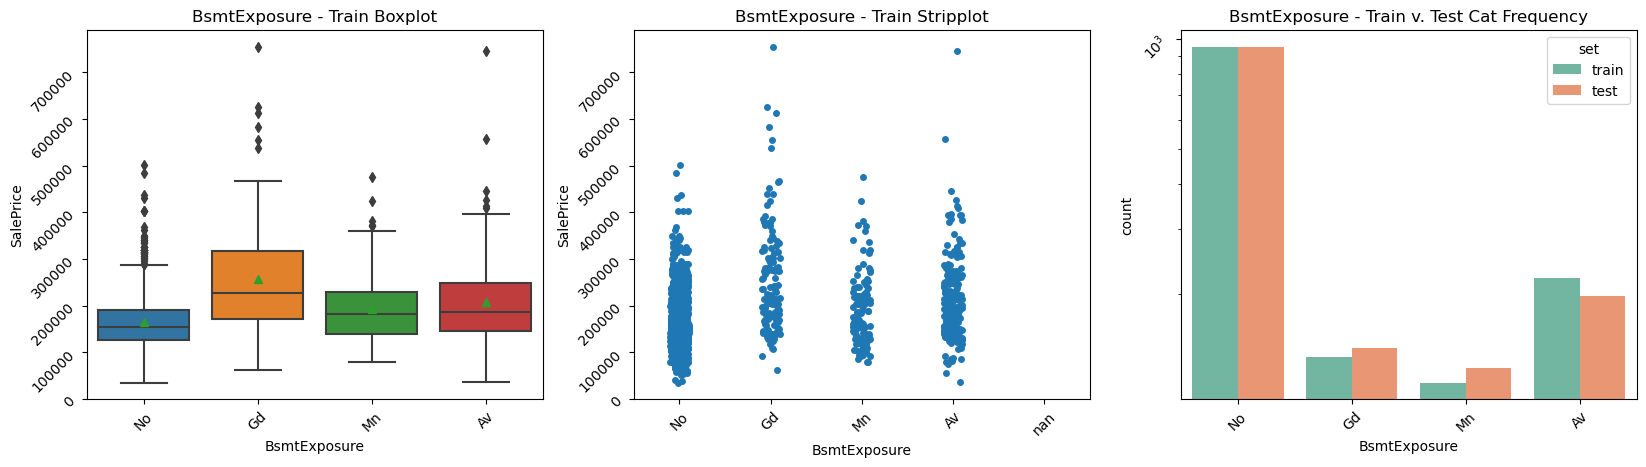

BsmtFinType1: Rating of basement finished area
 
        GLQ	Good Living Quarters
        ALQ	Average Living Quarters
        BLQ	Below Average Living Quarters	
        Rec	Average Rec Room
        LwQ	Low Quality
        Unf	Unfinshed
        NA	No Basement
 		



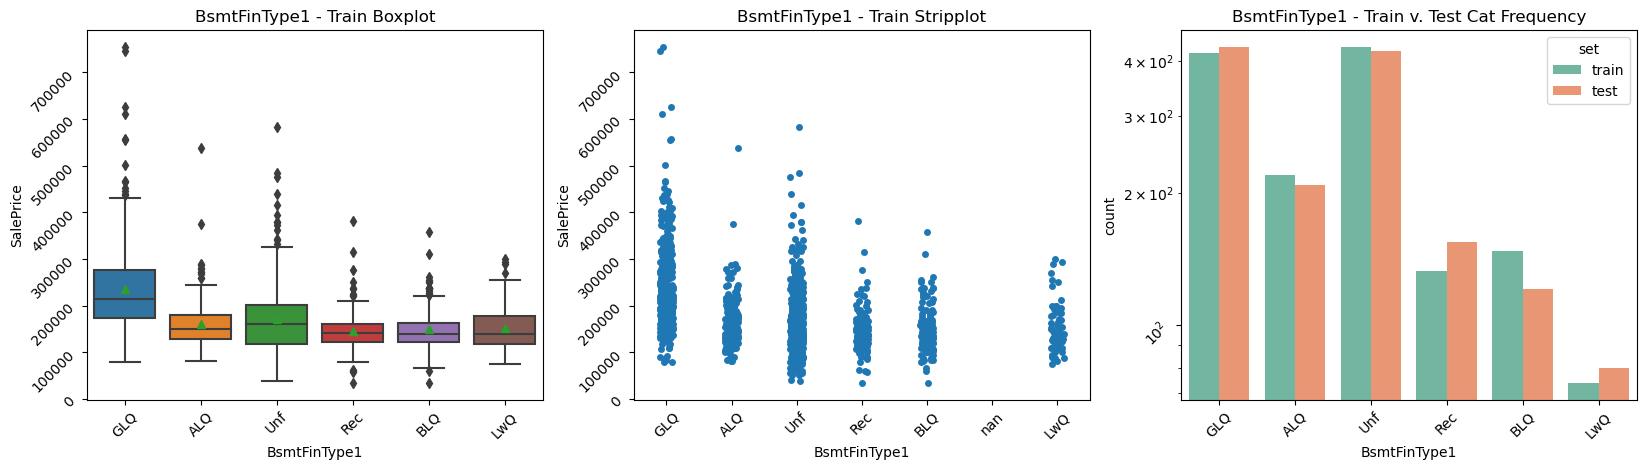

BsmtFinType2: Rating of basement finished area (if multiple types)
 
        GLQ	Good Living Quarters
        ALQ	Average Living Quarters
        BLQ	Below Average Living Quarters	
        Rec	Average Rec Room
        LwQ	Low Quality
        Unf	Unfinshed
        NA	No Basement
 



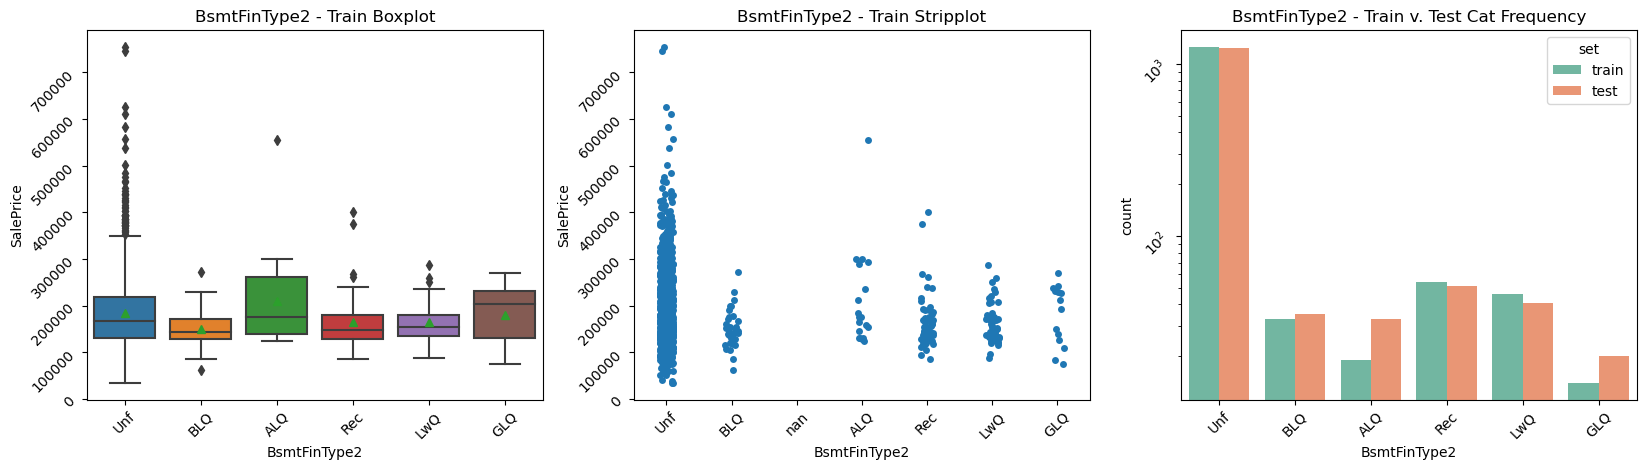

Heating: Type of heating
 		
        Floor	Floor Furnace
        GasA	Gas forced warm air furnace
        GasW	Gas hot water or steam heat
        Grav	Gravity furnace	
        OthW	Hot water or steam heat other than gas
        Wall	Wall furnace
 		



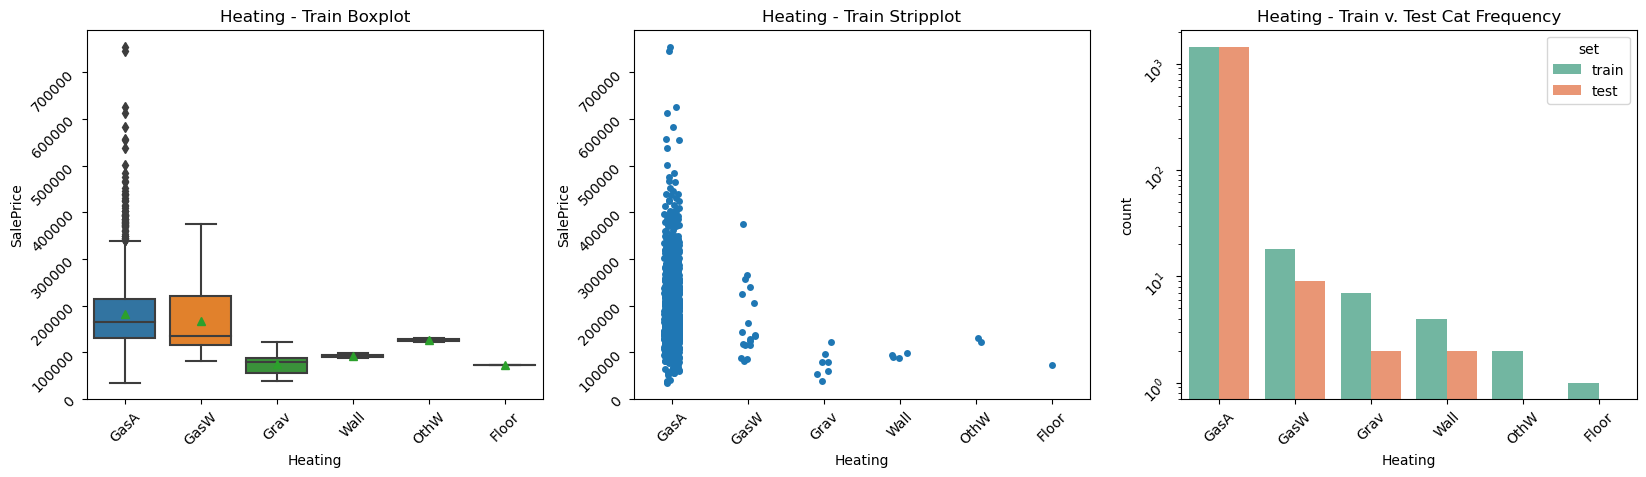

HeatingQC: Heating quality and condition
 
        Ex	Excellent
        Gd	Good
        TA	Average/Typical
        Fa	Fair
        Po	Poor
 		



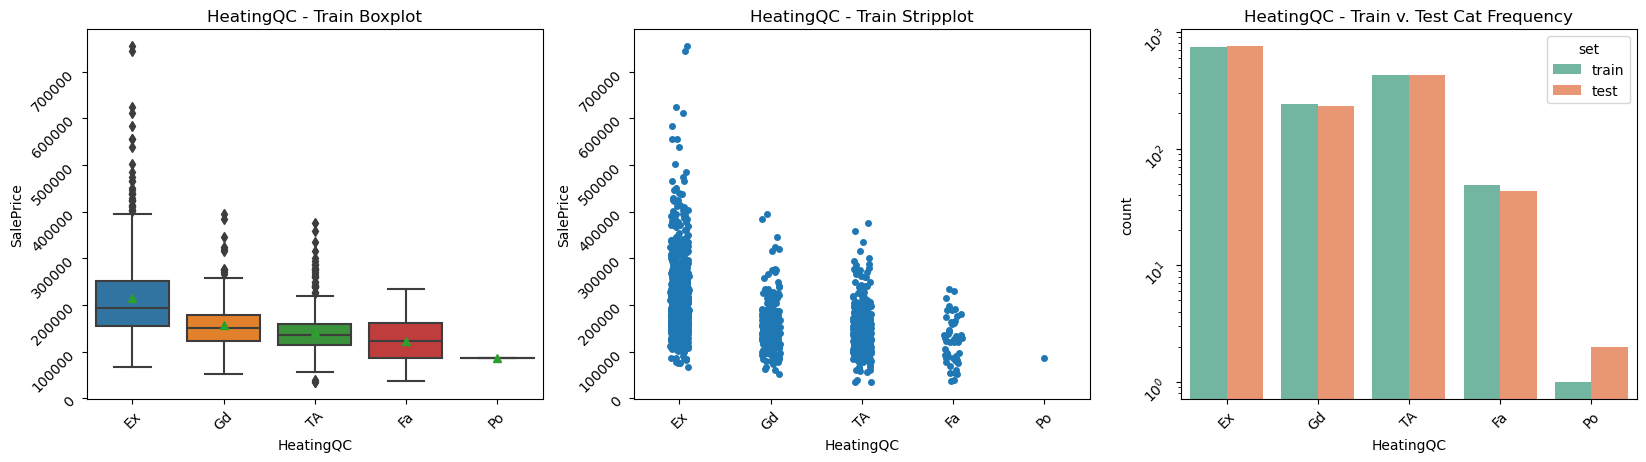

CentralAir: Central air conditioning
 
        N	No
        Y	Yes
 		



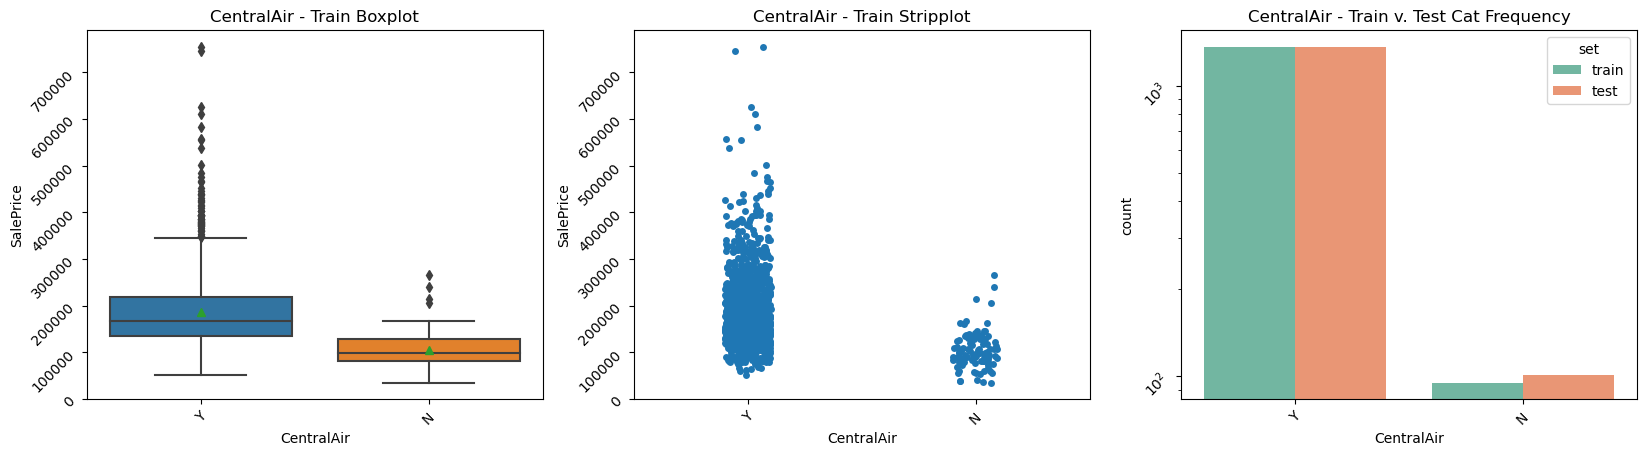

Electrical: Electrical system
 
        SBrkr	Standard Circuit Breakers & Romex
        FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
        FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
        FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
        Mix	Mixed
 		



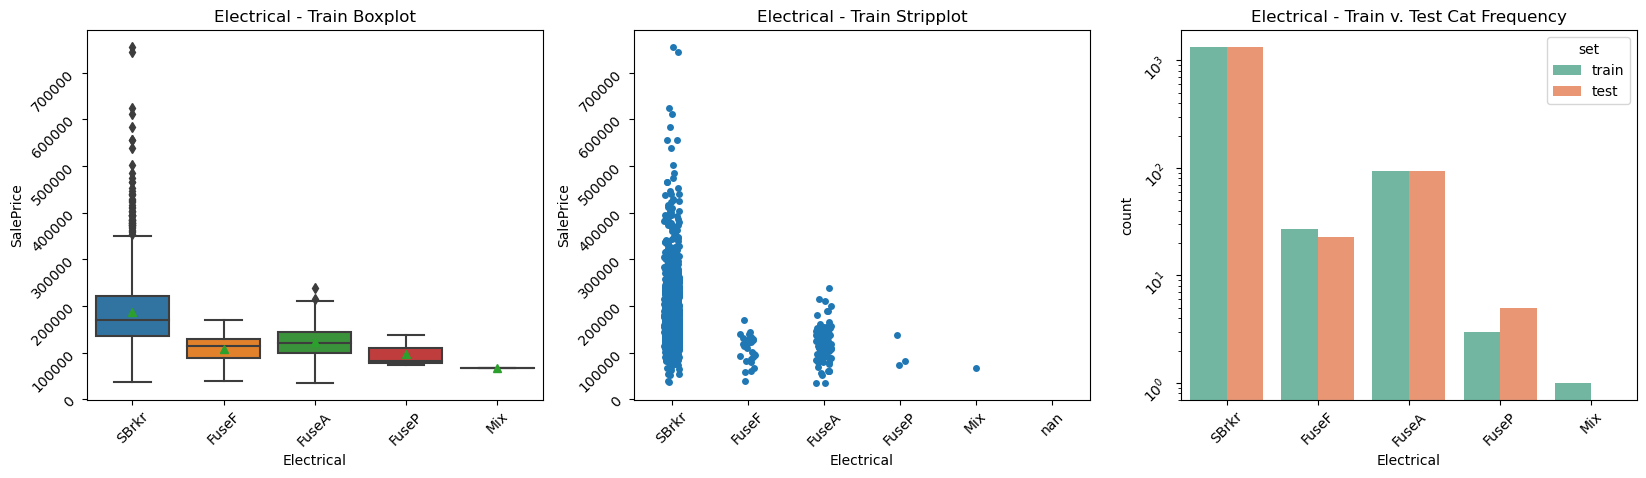

KitchenQual: Kitchen quality
 
        Ex	Excellent
        Gd	Good
        TA	Typical/Average
        Fa	Fair
        Po	Poor
        	



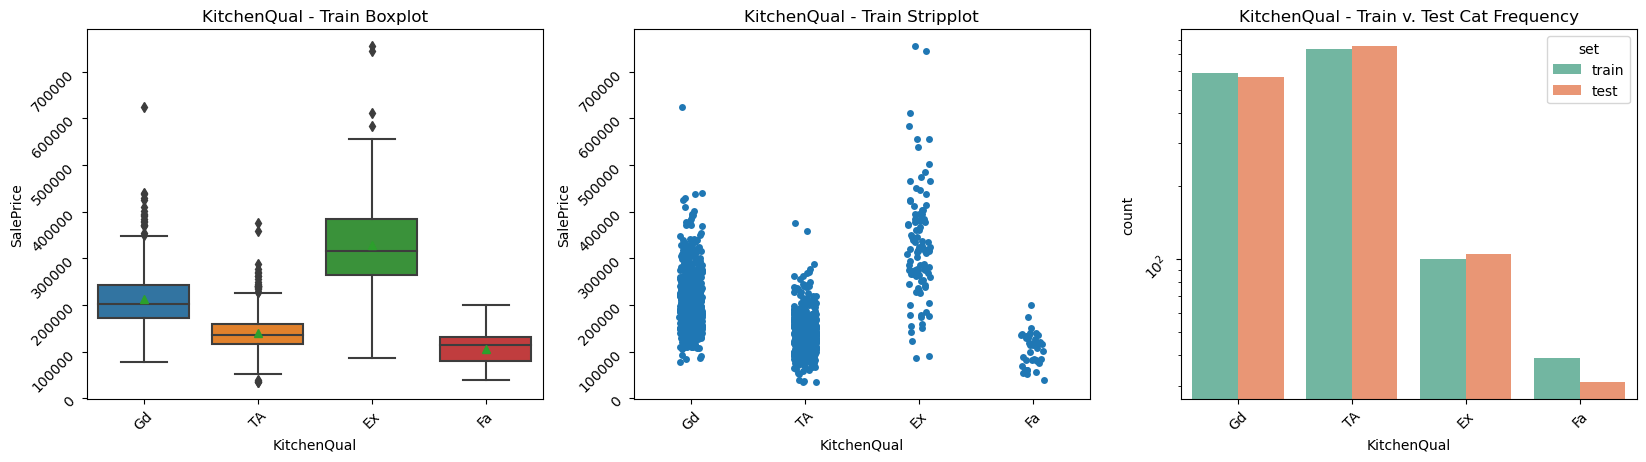

Functional: Home functionality (Assume typical unless deductions are warranted)
 
        Typ	Typical Functionality
        Min1	Minor Deductions 1
        Min2	Minor Deductions 2
        Mod	Moderate Deductions
        Maj1	Major Deductions 1
        Maj2	Major Deductions 2
        Sev	Severely Damaged
        Sal	Salvage only
 		



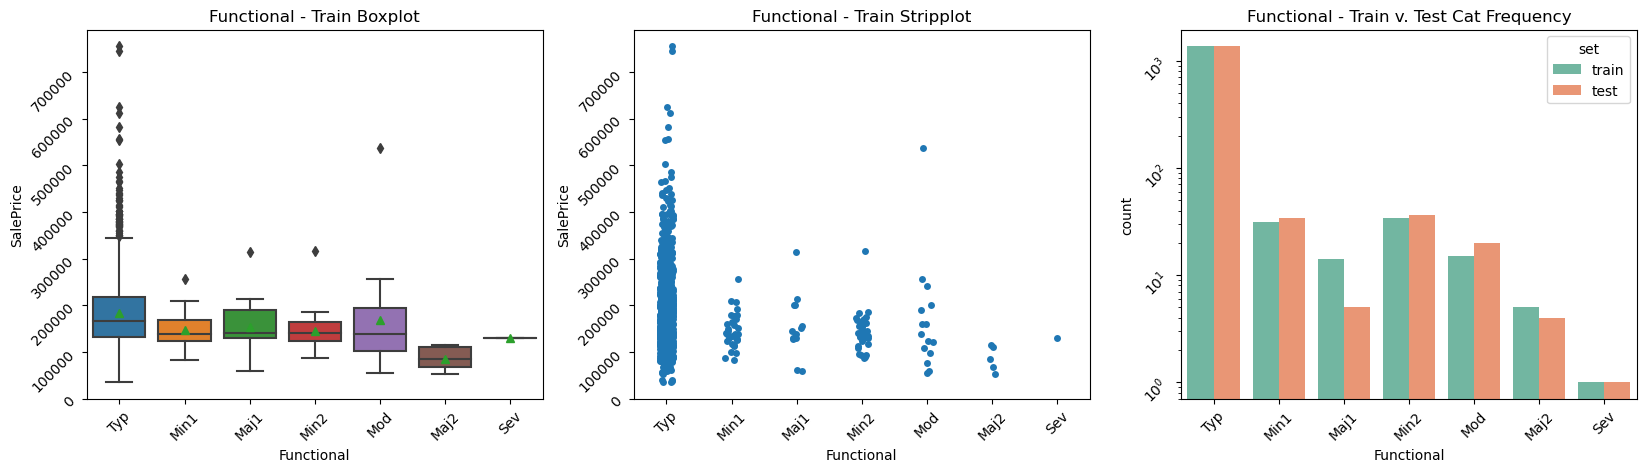

FireplaceQu: Fireplace quality
 
        Ex	Excellent - Exceptional Masonry Fireplace
        Gd	Good - Masonry Fireplace in main level
        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
        Fa	Fair - Prefabricated Fireplace in basement
        Po	Poor - Ben Franklin Stove
        NA	No Fireplace
 		



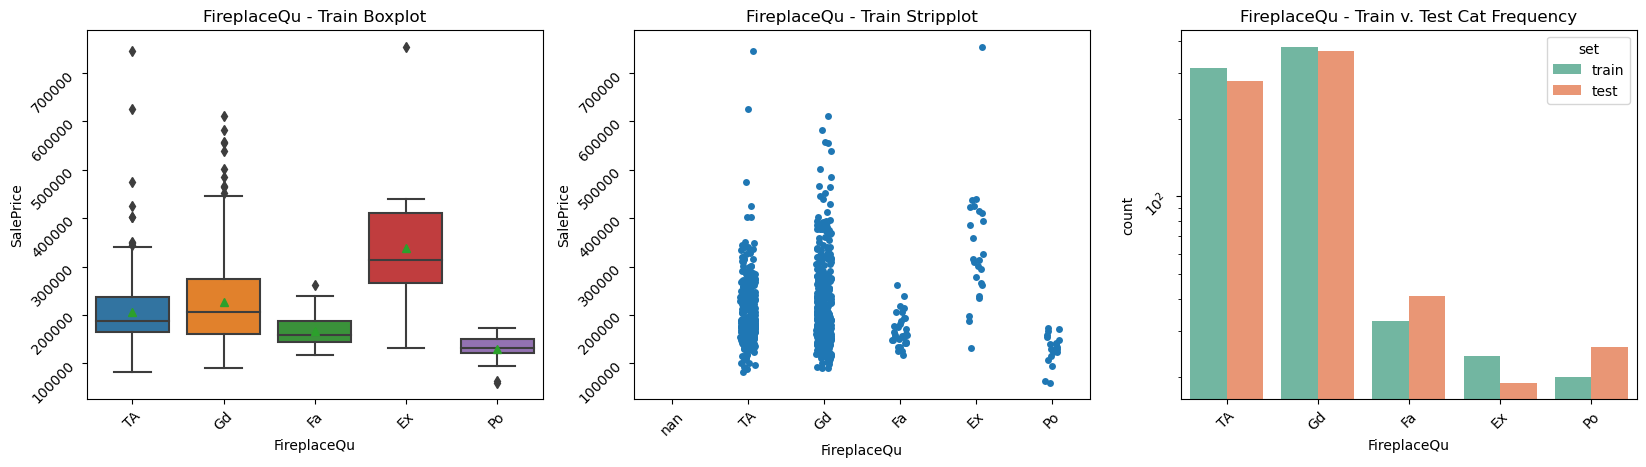

GarageType: Garage location
 		
        2Types	More than one type of garage
        Attchd	Attached to home
        Basment	Basement Garage
        BuiltIn	Built-In (Garage part of house - typically has room above garage)
        CarPort	Car Port
        Detchd	Detached from home
        NA	No Garage
 		



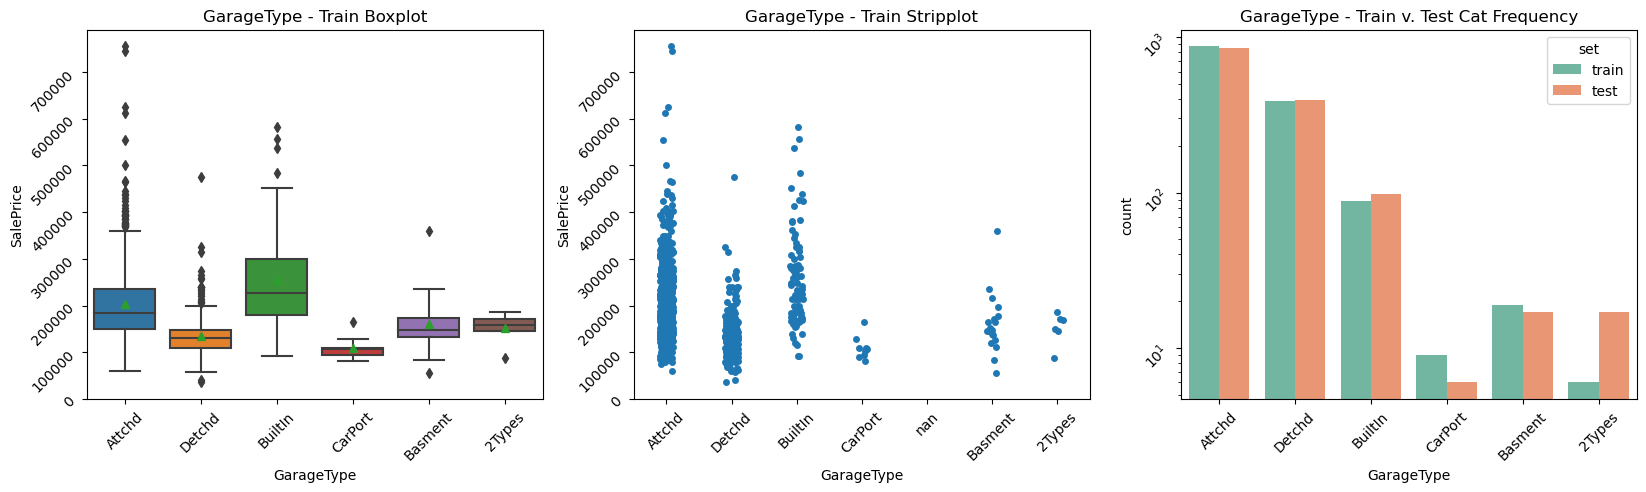

GarageFinish: Interior finish of the garage
 
        Fin	Finished
        RFn	Rough Finished	
        Unf	Unfinished
        NA	No Garage
 		



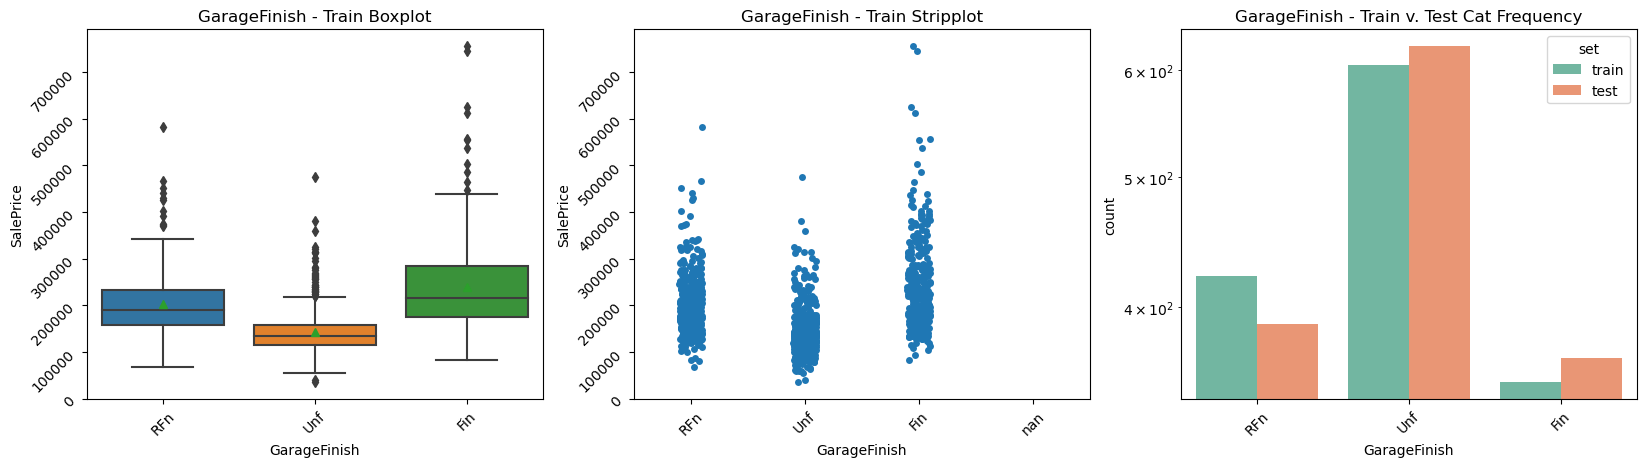

GarageQual: Garage quality
 
        Ex	Excellent
        Gd	Good
        TA	Typical/Average
        Fa	Fair
        Po	Poor
        NA	No Garage
 		



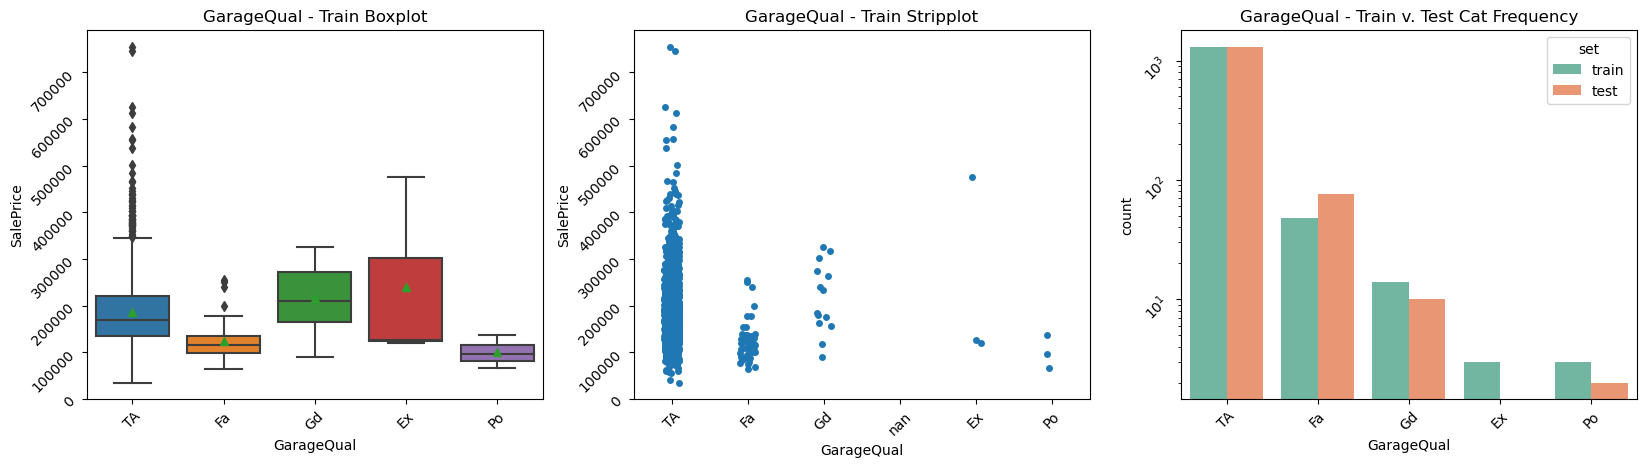

GarageCond: Garage condition
 
        Ex	Excellent
        Gd	Good
        TA	Typical/Average
        Fa	Fair
        Po	Poor
        NA	No Garage
 		



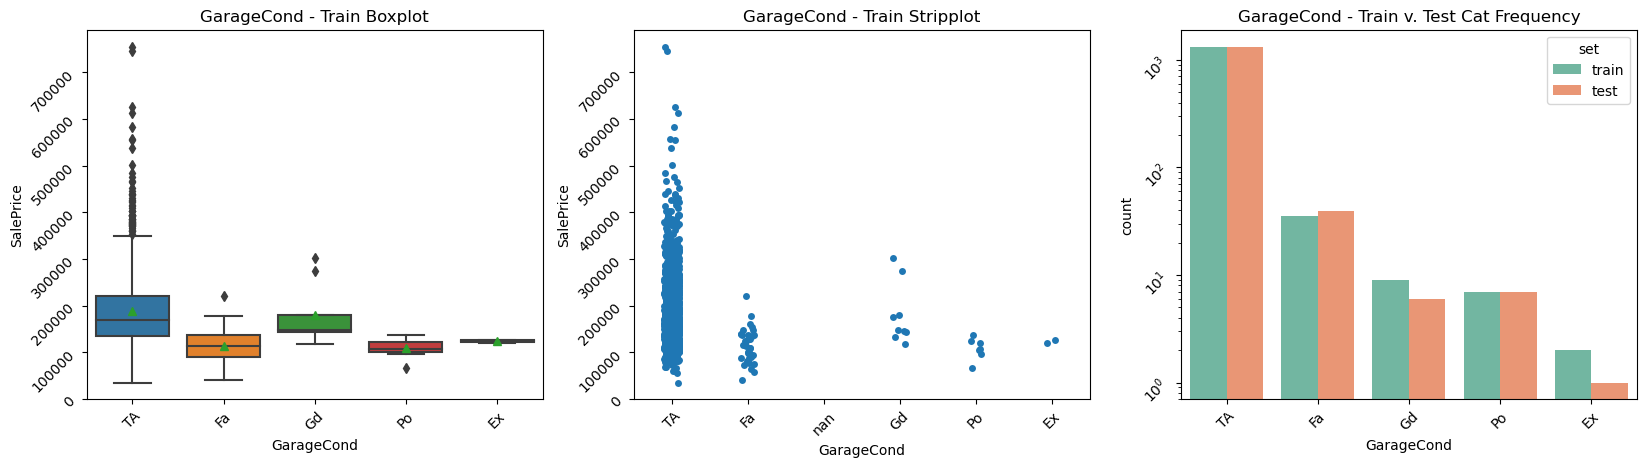

PavedDrive: Paved driveway
 
        Y	Paved 
        P	Partial Pavement
        N	Dirt/Gravel
 		



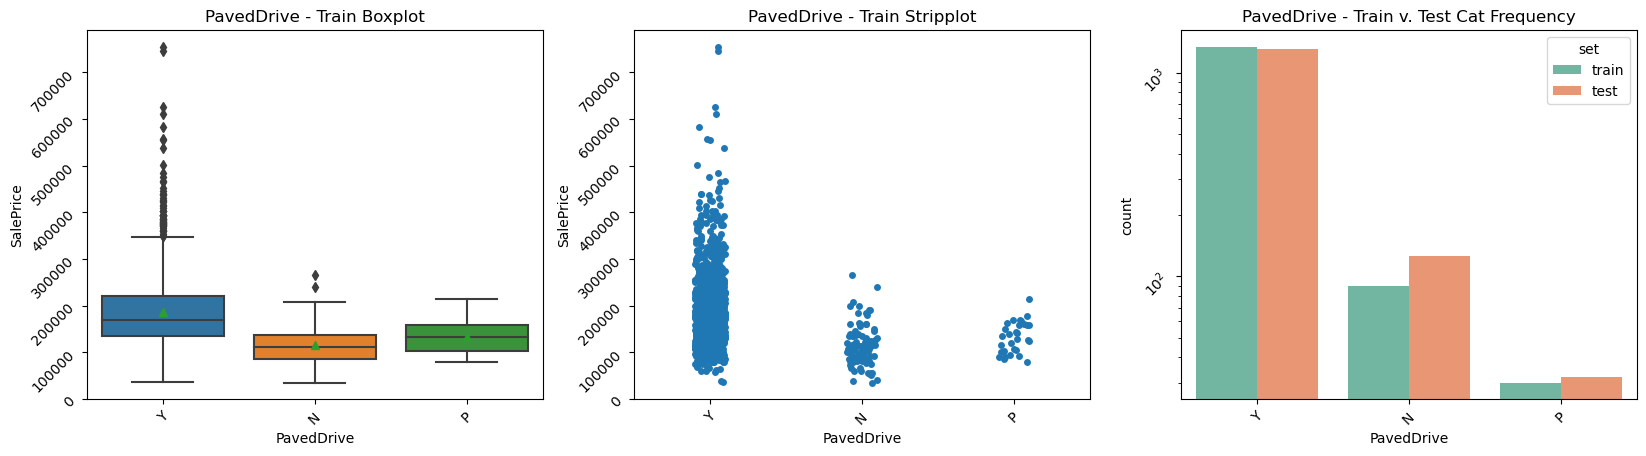

PoolQC: Pool quality
 		
        Ex	Excellent
        Gd	Good
        TA	Average/Typical
        Fa	Fair
        NA	No Pool
 		



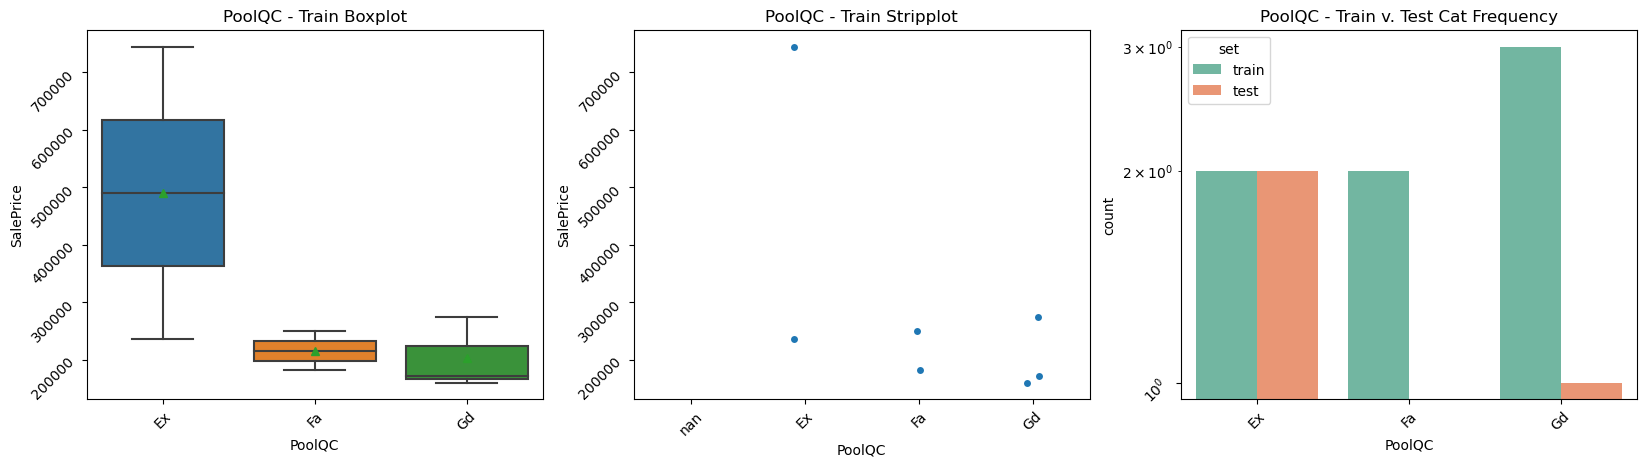

Fence: Fence quality
 		
        GdPrv	Good Privacy
        MnPrv	Minimum Privacy
        GdWo	Good Wood
        MnWw	Minimum Wood/Wire
        NA	No Fence
 	



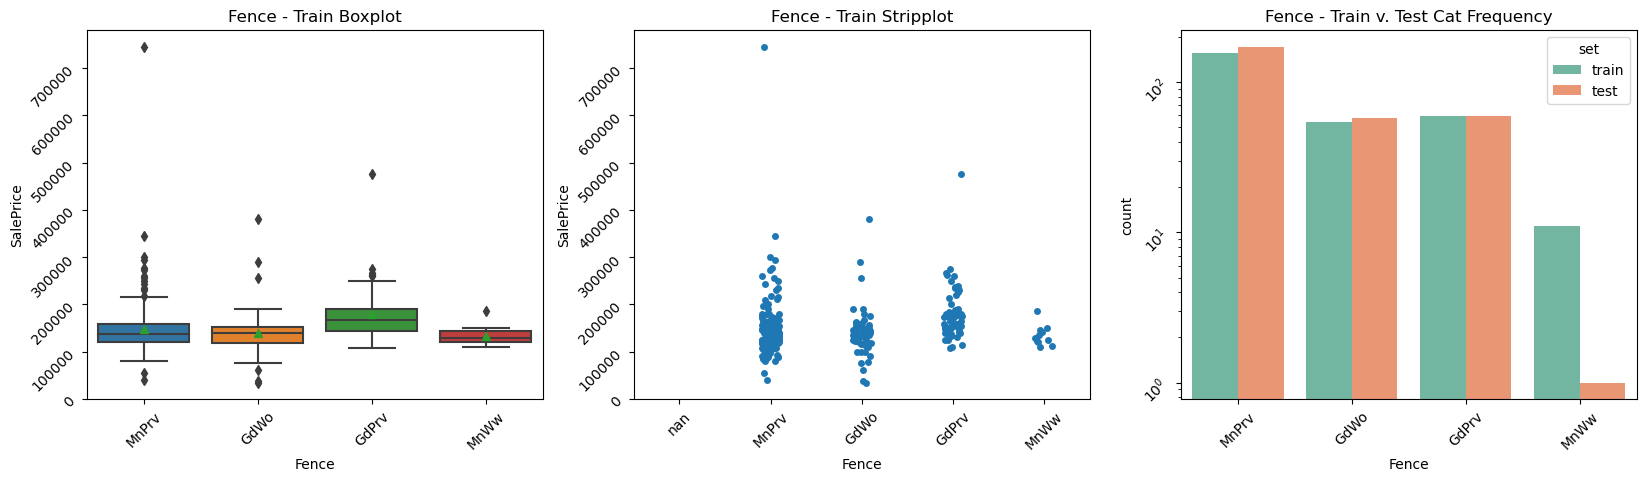

MiscFeature: Miscellaneous feature not covered in other categories
 		
        Elev	Elevator
        Gar2	2nd Garage (if not described in garage section)
        Othr	Other
        Shed	Shed (over 100 SF)
        TenC	Tennis Court
        NA	None
 		



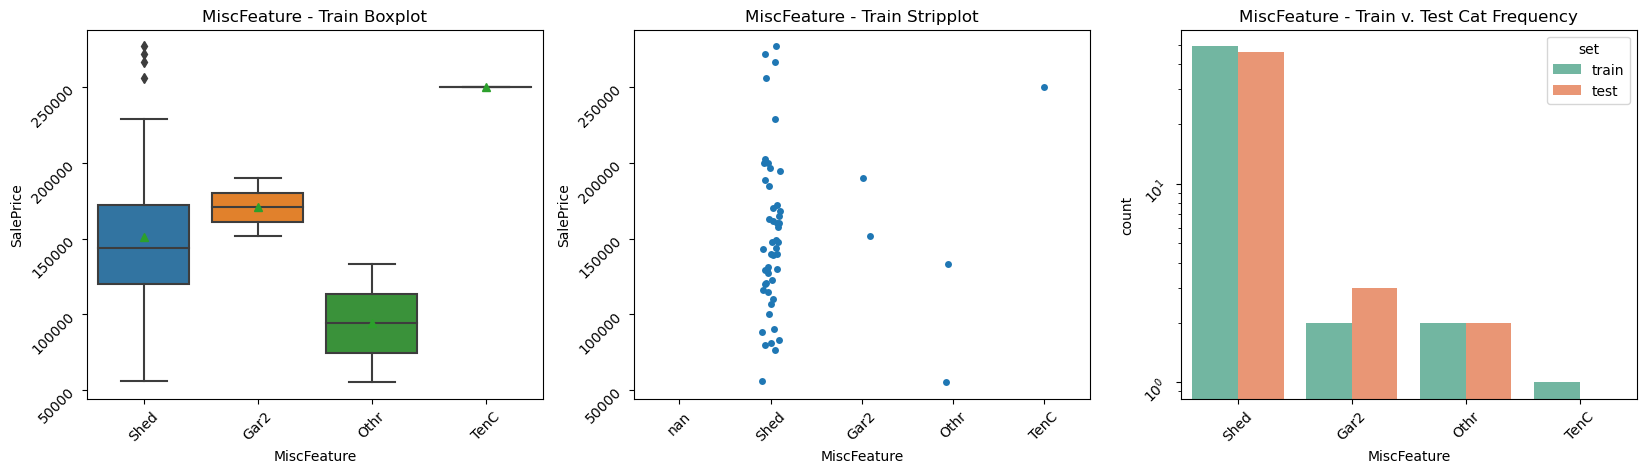

SaleType: Type of sale
 		
        WD 	Warranty Deed - Conventional
        CWD	Warranty Deed - Cash
        VWD	Warranty Deed - VA Loan
        New	Home just constructed and sold
        COD	Court Officer Deed/Estate
        Con	Contract 15% Down payment regular terms
        ConLw	Contract Low Down payment and low interest
        ConLI	Contract Low Interest
        ConLD	Contract Low Down
        Oth	Other
 		



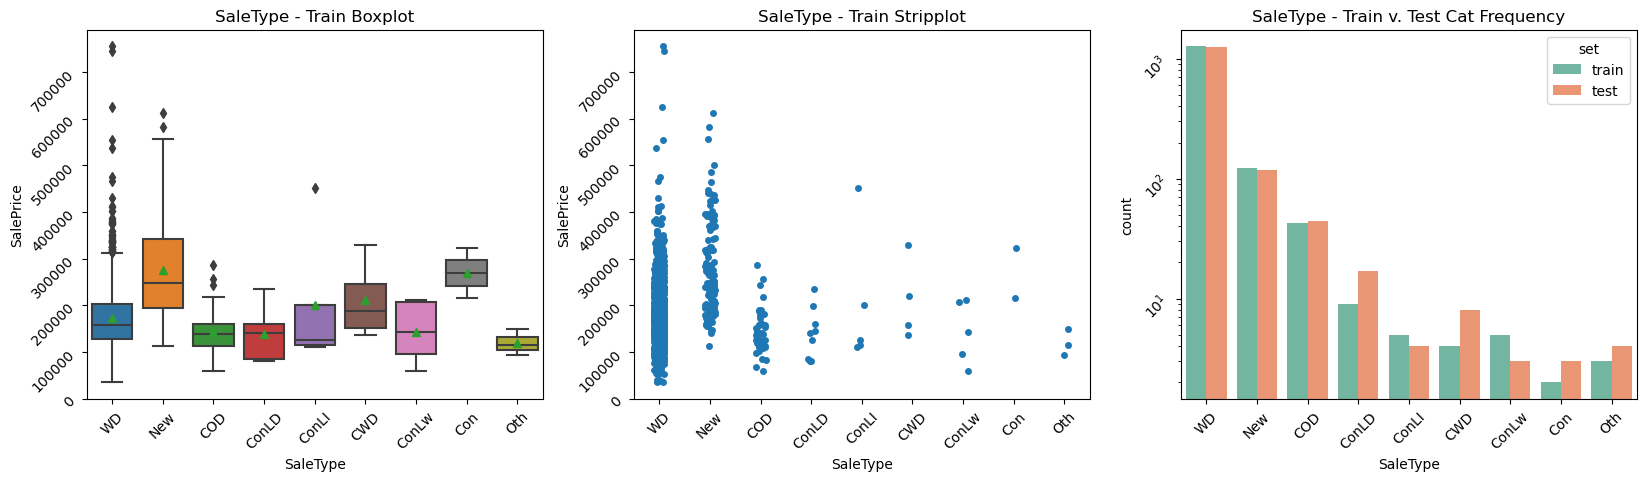

SaleCondition: Condition of sale
 
        Normal	Normal Sale
        Abnorml	Abnormal Sale -  trade, foreclosure, short sale
        AdjLand	Adjoining Land Purchase
        Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
        Family	Sale between family members



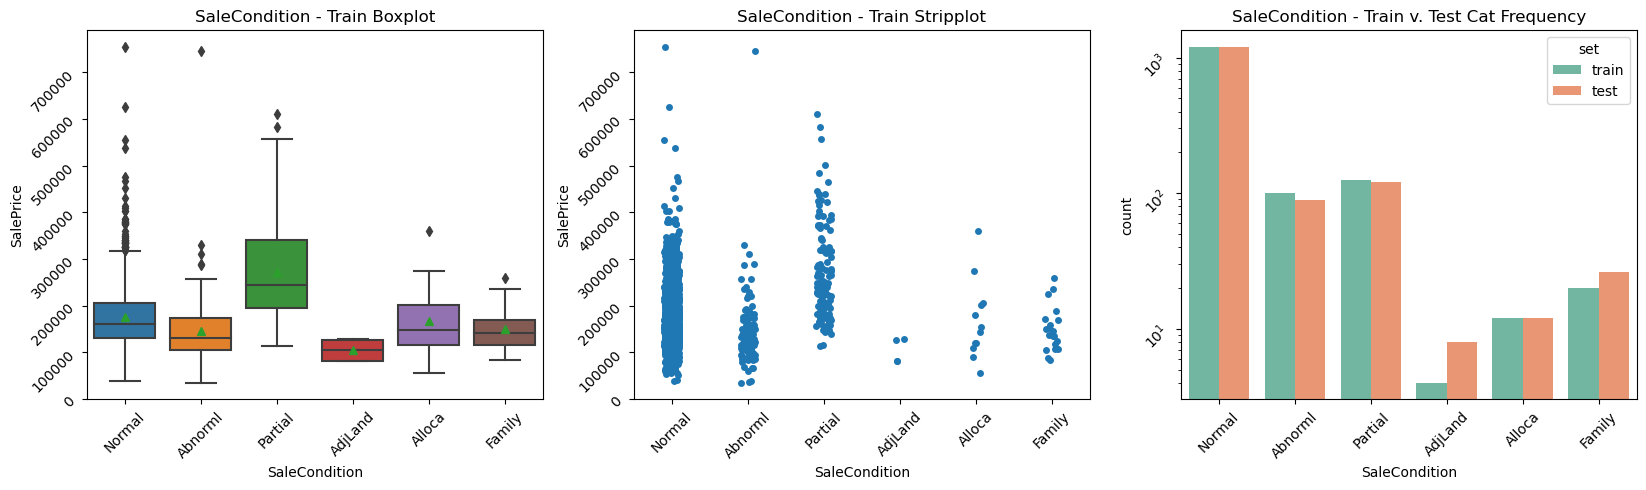

In [52]:
for col in cat_cols:

    fig, axes = plt.subplots(1,3,sharey=False)
    fig.set_figwidth(20)
    axes = axes.flatten()
    axes[0].tick_params(rotation=45)
    axes[1].tick_params(rotation=45)
    axes[2].tick_params(rotation=45)
    bax = sns.boxplot(data=train, x=col, 
                y='SalePrice', 
                ax=axes[0],showmeans=True);
    bax.set_title(f'{col} - Train Boxplot')
    sax = sns.stripplot(data=train,
             x=col,
             y='SalePrice',
             ax=axes[1])
    sax.set_title(f'{col} - Train Stripplot')
    ax = sns.countplot(data=comb, x=col, hue='set', ax=axes[2],palette=sns.color_palette("Set2"))
    ax.set_yscale('log')
    ax.set_title(f"{col} - Train v. Test Cat Frequency")
    
    docdict[col]['charts']= fig
    HTML(show(col))
    plt.show()
    display(HTML('<p></n><p>'));
    

## 2.3 Evaluation ##

In the last section each categorical column was plotted representating their statistical properties through a box and stripplot.  We also evaluated these against the frequencies of each value in the training/test sets. While reviewing each of these plots for a particular category, I was keen to see where there were larger frequencies of specific values in the Test vs the Training set (imbalances).  A much larger frequency of a particular value in the test set without a reasonable number of observations in the training (validated through review of the stripplot) , could mean larger error in our predictions as our prospective models may not have enough observations to observations with that value well enough, increasing bias. 

A few observations:
 - 'Utilities' doesn't appear to provide much information about the test set as it only appears that one value is used throughout. We won't use this column for feature generation.
 - There were several Quality/Ratings-based columns (Good, Fair, Poor, etc.) where the training set had very few instances of a particular ratings category compared to the test set.  Some of these include ExterQual, ExterCond, BsmtQual,BsmtCond to name a few examples. One way we could go about solving this is combining into a super category where we can perceive that the categories are adjacent but are of similar range and/or variance (ie. Combining fair and poor together).
 - Non-quality or ratings-based columns could also get the same treatment and should be categorized according to a concept.  For example, the condition columns have several values that correspond to proximity to a railroad. It might be worth combining these. 
 - Speaking of the conditions columns, in some cases, some columns share the same/similar attributes are were meant to keep each house as one row (Condition1, Condition2).  In these cases, it makes sense to combine both columns through a one-hot encoding technique
 - Neighborhood contains a large number of values creating an unnecessary number of dummy (indicator) variables.  It would make sense that we'd want to associate this column to the target (target variable encoding).  One thing to look out for is that some neighborhoods are underrepresented in the training set.


In the next notebook, I'll work through transformation of these features with the ultimate goal of developing a dataset we can train several models on.